<a href="https://colab.research.google.com/github/agokmenefe/Data-Science/blob/main/ML/Assignments/military_power_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score,accuracy_score,precision_score,f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer
from xgboost import XGBClassifier  # önce hata verdi, sonra alttaki satırı çalıştırıp ayrıca install ettim. 

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Ingest Data  

In [3]:
df1 = pd.read_excel('/content/World military power.xlsx',header=[0, 1])

In [4]:
df = df1.copy()

# EDA

## Implement basic steps to see how is your data looks like

In [5]:
df.head()

2020 ranking                               Airforce Strength  \
  Military Strength Military Strength Power Index Aircraft Strength   
0       Afghanistan                        1.3444       Afghanistan   
1           Albania                        2.3137           Albania   
2           Algeria                        0.4659           Algeria   
3            Angola                        0.8379            Angola   
4         Argentina                        0.6521         Argentina   

                                                        \
  Aircraft Strength value Fighter/Interceptor Strength   
0                   260.0                  Afghanistan   
1                    19.0                      Albania   
2                   551.0                      Algeria   
3                   295.0                       Angola   
4                   227.0                    Argentina   

                                                               \
  Fighter/Interceptor Strength value Attack Aircraft Strength   
0                                0.0              Afghanistan   
1                                0.0                  Albania   
2                              103.0                  Algeria   
3                               72.0                   Angola   
4                               24.0                Argentina   

                                                                    \
  Attack Aircraft Strength value Transport Aircraft Fleet Strength   
0                           25.0                       Afghanistan   
1                            0.0                           Albania   
2                           22.0                           Algeria   
3                           18.0                            Angola   
4                            7.0                         Argentina   

                                           ...         Manpower  \
  Transport Aircraft Fleet Strength value  ... Total Population   
0                                    30.0  ...      Afghanistan   
1                                     0.0  ...          Albania   
2                                    59.0  ...          Algeria   
3                                    30.0  ...           Angola   
4                                     9.0  ...        Argentina   

                                      Geography                               \
  Total Population value Total Square Land Area Total Square Land Area value   
0            3,49,40,837            Afghanistan                     6,52,230   
1              30,57,220                Albania                      28748.0   
2            4,16,57,488                Algeria                    23,81,741   
3            3,03,55,880                 Angola                    12,46,700   
4            4,46,94,198              Argentina                    27,80,400   

                                                           \
  Total Coastline Coverage Total Coastline Coverage value   
0              Afghanistan                            0.0   
1                  Albania                          362.0   
2                  Algeria                          998.0   
3                   Angola                         1600.0   
4                Argentina                         4989.0   

                                                                               \
  Total Waterway Coverage Total Waterway Coverage value Total Border Coverage   
0             Afghanistan                        1200.0           Afghanistan   
1                 Albania                          41.0               Albania   
2                 Algeria                           0.0               Algeria   
3                  Angola                        1300.0                Angola   
4               Argentina                       11000.0             Argentina   

                               
  Total Border Coverage value  
0                      5987.0  
1                       691.0  


In [6]:
df.columns

MultiIndex([(     '2020 ranking',                       'Military Strength'),
            (     '2020 ranking',           'Military Strength Power Index'),
            ('Airforce Strength',                       'Aircraft Strength'),
            ('Airforce Strength',                 'Aircraft Strength value'),
            ('Airforce Strength',            'Fighter/Interceptor Strength'),
            ('Airforce Strength',      'Fighter/Interceptor Strength value'),
            ('Airforce Strength',                'Attack Aircraft Strength'),
            ('Airforce Strength',          'Attack Aircraft Strength value'),
            ('Airforce Strength',       'Transport Aircraft Fleet Strength'),
            ('Airforce Strength', 'Transport Aircraft Fleet Strength value'),
            ('Airforce Strength',                  'Trainer Aircraft Fleet'),
            ('Airforce Strength',            'Trainer Aircraft Fleet value'),
            ('Airforce Strength',               'Helicopter Flee

In [7]:
df["2020 ranking"]

Military Strength  Military Strength Power Index
0         Afghanistan                         1.3444
1             Albania                         2.3137
2             Algeria                         0.4659
3              Angola                         0.8379
4           Argentina                         0.6521
..                ...                            ...
133         Venezuela                         0.6449
134           Vietnam                         0.3559
135             Yemen                         1.2412
136            Zambia                         1.6464
137          Zimbabwe                         1.7577

[138 rows x 2 columns]

In [8]:
df["Airforce Strength"]

Aircraft Strength  Aircraft Strength value Fighter/Interceptor Strength  \
0         Afghanistan                    260.0                  Afghanistan   
1             Albania                     19.0                      Albania   
2             Algeria                    551.0                      Algeria   
3              Angola                    295.0                       Angola   
4           Argentina                    227.0                    Argentina   
..                ...                      ...                          ...   
133         Venezuela                    260.0                    Venezuela   
134           Vietnam                    293.0                      Vietnam   
135             Yemen                    169.0                        Yemen   
136            Zambia                    108.0                       Zambia   
137          Zimbabwe                     90.0                     Zimbabwe   

     Fighter/Interceptor Strength value Attack Aircraft Strength  \
0                                   0.0              Afghanistan   
1                                   0.0                  Albania   
2                                 103.0                  Algeria   
3                                  72.0                   Angola   
4                                  24.0                Argentina   
..                                  ...                      ...   
133                                38.0                Venezuela   
134                                77.0                  Vietnam   
135                                77.0                    Yemen   
136                                18.0                   Zambia   
137                                10.0                 Zimbabwe   

     Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
0                              25.0                       Afghanistan   
1                               0.0                           Albania   
2                              22.0                           Algeria   
3                              18.0                            Angola   
4                               7.0                         Argentina   
..                              ...                               ...   
133                             0.0                         Venezuela   
134                             0.0                           Vietnam   
135                             0.0                             Yemen   
136                             0.0                            Zambia   
137                             0.0                          Zimbabwe   

     Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  \
0                                       30.0            Afghanistan   
1                                        0.0                Albania   
2                                       59.0                Algeria   
3                                       30.0                 Angola   
4                                        9.0              Argentina   
..                                       ...                    ...   
133                                     52.0              Venezuela   
134                                     38.0                Vietnam   
135                                      8.0                  Yemen   
136                                     11.0                 Zambia   
137                                     14.0               Zimbabwe   

     Trainer Aircraft Fleet value Helicopter Fleet Strength  \
0                             0.0               Afghanistan   
1                             0.0                   Albania   
2                            87.0                   Algeria   
3                            47.0                    Angola   
4                            64.0                 Argentina   
..                            ...                       ...   
133                          82.0                 Venezuela   
134 

In [9]:
df['Land Strength']

Tank Strength  Tank Strength value AFV/APC Strength  \
0     Afghanistan                  0.0      Afghanistan   
1         Albania                  0.0          Albania   
2         Algeria                880.0          Algeria   
3          Angola                379.0           Angola   
4       Argentina                370.0        Argentina   
..            ...                  ...              ...   
133     Venezuela                390.0        Venezuela   
134       Vietnam               2615.0          Vietnam   
135         Yemen                620.0            Yemen   
136        Zambia                 75.0           Zambia   
137      Zimbabwe                 42.0         Zimbabwe   

     AFV/APC Strength value Self-Propelled Artillery Strength  \
0                    1062.0                       Afghanistan   
1                     467.0                           Albania   
2                    7361.0                           Algeria   
3                     595.0                            Angola   
4                     739.0                         Argentina   
..                      ...                               ...   
133                   600.0                         Venezuela   
134                  2530.0                           Vietnam   
135                   615.0                             Yemen   
136                   184.0                            Zambia   
137                   300.0                          Zimbabwe   

     Self-Propelled Artillery Strength value Towed Artillery Strength  \
0                                        0.0              Afghanistan   
1                                        0.0                  Albania   
2                                      320.0                  Algeria   
3                                       28.0                   Angola   
4                                       83.0                Argentina   
..                                       ...                      ...   
133                                     73.0                Venezuela   
134                                     70.0                  Vietnam   
135                                     20.0                    Yemen   
136                                      0.0                   Zambia   
137                                      0.0                 Zimbabwe   

     Towed Artillery Strength value Rocket Projector Strength  \
0                             176.0               Afghanistan   
1                               0.0                   Albania   
2                             240.0                   Algeria   
3                             357.0                    Angola   
4                             172.0                 Argentina   
..                              ...                       ...   
133                           104.0                 Venezuela   
134                          1000.0                   Vietnam   
135                            85.0                     Yemen   
136                            42.0                    Zambia   
137                            65.0                  Zimbabwe   

     Rocket Projector Strength value  
0                               50.0  
1                                0.0  
2                              316.0  
3                              115.0  
4                               26.0  
..                               ...  
133                             36.0  
134                             85.0  
135                            150.0  
136                             50.0  
137                             22.0  

[138 rows x 10 columns]

In [10]:
df['Navy Strength']

Navy Fleet Strengths  Navy Fleet Strengths value  \
0            Afghanistan                         0.0   
1                Albania                        38.0   
2                Algeria                       201.0   
3                 Angola                        57.0   
4              Argentina                        49.0   
..                   ...                         ...   
133            Venezuela                        49.0   
134              Vietnam                        65.0   
135                Yemen                        30.0   
136               Zambia                         0.0   
137             Zimbabwe                         0.0   

    Aircraft Carrier Fleet Strength  Aircraft Carrier Fleet Strength value  \
0                       Afghanistan                                    0.0   
1                           Albania                                    0.0   
2                           Algeria                                    0.0   
3                            Angola                                    0.0   
4                         Argentina                                    0.0   
..                              ...                                    ...   
133                       Venezuela                                    0.0   
134                         Vietnam                                    0.0   
135                           Yemen                                    0.0   
136                          Zambia                                    0.0   
137                        Zimbabwe                                    0.0   

    Submarine Fleet Strength  Submarine Fleet Strength value  \
0                Afghanistan                             0.0   
1                    Albania                             0.0   
2                    Algeria                             6.0   
3                     Angola                             0.0   
4                  Argentina                             2.0   
..                       ...                             ...   
133                Venezuela                             2.0   
134                  Vietnam                             6.0   
135                    Yemen                             0.0   
136                   Zambia                             0.0   
137                 Zimbabwe                             0.0   

    Destroyer Fleet Strength  Destroyer Fleet Strength value  \
0                Afghanistan                             0.0   
1                    Albania                             0.0   
2                    Algeria                             0.0   
3                     Angola                             0.0   
4                  Argentina                             4.0   
..                       ...                             ...   
133                Venezuela                             0.0   
134                  Vietnam                             0.0   
135                    Yemen                             0.0   
136                   Zambia                             0.0   
137                 Zimbabwe                             0.0   

    Frigate Fleet Strength  Frigate Fleet Strength value  
0              Afghanistan                           0.0  
1                  Albania                           0.0  
2                  Algeria                           5.0  
3                   Angola                           0.0  
4                Argentina                           0.0  
..                     ...                           ...  
133              Venezuela                           4.0  
134                Vietnam                           9.0  
135                  Yemen                           0.0  
136                 Zambia                           0.0  
137               Zimbabwe                           0.0  

[138 rows x 10 columns]

In [11]:
df['Finances']

defense spending budget defense spending budget value External Debt  \
0               Afghanistan               12,00,00,00,000   Afghanistan   
1                   Albania                  25,00,00,000       Albania   
2                   Algeria               13,00,00,00,000       Algeria   
3                    Angola                7,00,00,00,000        Angola   
4                 Argentina                4,20,00,00,000     Argentina   
..                      ...                           ...           ...   
133               Venezuela                  74,50,00,000     Venezuela   
134                 Vietnam                5,50,00,00,000       Vietnam   
135                   Yemen                1,40,00,00,000         Yemen   
136                  Zambia                   4,00,00,000        Zambia   
137                Zimbabwe                  10,00,00,000      Zimbabwe   

    External Debt value  
0        2,84,00,00,000  
1        9,50,50,00,000  
2        6,26,00,00,000  
3       42,08,00,00,000  
4     2,14,90,00,00,000  
..                  ...  
133   1,00,30,00,00,000  
134     96,58,00,00,000  
135      7,06,80,00,000  
136     11,66,00,00,000  
137      9,35,70,00,000  

[138 rows x 4 columns]

In [12]:
df['Natural resources']

Oil Production Oil Production value Oil Consumption Oil Consumption value  \
0      Afghanistan                  0.0     Afghanistan                5500.0   
1          Albania              16000.0         Albania               42500.0   
2          Algeria            13,06,000         Algeria              3,25,000   
3           Angola            16,66,000          Angola               82300.0   
4        Argentina             4,79,400       Argentina              6,85,000   
..             ...                  ...             ...                   ...   
133      Venezuela            20,07,000       Venezuela              5,75,000   
134        Vietnam             2,71,400         Vietnam              5,25,000   
135          Yemen              12260.0           Yemen              1,45,000   
136         Zambia                  0.0          Zambia               21000.0   
137       Zimbabwe                  0.0        Zimbabwe               19500.0   

    Proven Oil Reserves Proven Oil Reserves value  
0           Afghanistan                       0.0  
1               Albania              16,83,00,000  
2               Algeria           12,20,00,00,000  
3                Angola            8,27,30,00,000  
4             Argentina            2,18,50,00,000  
..                  ...                       ...  
133           Venezuela         3,00,90,00,00,000  
134             Vietnam            4,40,00,00,000  
135               Yemen            3,00,00,00,000  
136              Zambia                       0.0  
137            Zimbabwe                       0.0  

[138 rows x 6 columns]

In [13]:
df['Manpower']

Available Manpower Available Manpower value Total Population  \
0          Afghanistan              1,43,25,743      Afghanistan   
1              Albania                15,19,438          Albania   
2              Algeria              2,07,41,263          Algeria   
3               Angola                62,44,205           Angola   
4            Argentina              2,01,79,430        Argentina   
..                 ...                      ...              ...   
133          Venezuela              1,42,60,129        Venezuela   
134            Vietnam              5,10,43,216          Vietnam   
135              Yemen              1,12,66,221            Yemen   
136             Zambia                61,66,905           Zambia   
137           Zimbabwe                55,84,086         Zimbabwe   

    Total Population value  
0              3,49,40,837  
1                30,57,220  
2              4,16,57,488  
3              3,03,55,880  
4              4,46,94,198  
..                     ...  
133            3,16,89,176  
134            9,70,40,334  
135            2,86,67,230  
136            1,64,45,079  
137            1,40,30,368  

[138 rows x 4 columns]

In [14]:
df['Geography']

Total Square Land Area Total Square Land Area value  \
0              Afghanistan                     6,52,230   
1                  Albania                      28748.0   
2                  Algeria                    23,81,741   
3                   Angola                    12,46,700   
4                Argentina                    27,80,400   
..                     ...                          ...   
133              Venezuela                     9,12,050   
134                Vietnam                     3,31,210   
135                  Yemen                     5,27,968   
136                 Zambia                     7,52,618   
137               Zimbabwe                     3,90,757   

    Total Coastline Coverage Total Coastline Coverage value  \
0                Afghanistan                            0.0   
1                    Albania                          362.0   
2                    Algeria                          998.0   
3                     Angola                         1600.0   
4                  Argentina                         4989.0   
..                       ...                            ...   
133                Venezuela                         2800.0   
134                  Vietnam                         3444.0   
135                    Yemen                         1906.0   
136                      NaN                            NaN   
137                      NaN                            NaN   

    Total Waterway Coverage Total Waterway Coverage value  \
0               Afghanistan                        1200.0   
1                   Albania                          41.0   
2                   Algeria                           0.0   
3                    Angola                        1300.0   
4                 Argentina                       11000.0   
..                      ...                           ...   
133               Venezuela                        7100.0   
134                 Vietnam                       17702.0   
135                   Yemen                           0.0   
136                  Zambia                        2250.0   
137                Zimbabwe                           0.0   

    Total Border Coverage  Total Border Coverage value  
0             Afghanistan                       5987.0  
1                 Albania                        691.0  
2                 Algeria                       6734.0  
3                  Angola                       5369.0  
4               Argentina                      11968.0  
..                    ...                          ...  
133             Venezuela                       5267.0  
134               Vietnam                       4616.0  
135                 Yemen                       1601.0  
136                Zambia                       6043.0  
137              Zimbabwe                       3229.0  

[138 rows x 8 columns]

In [15]:
df["2020 ranking"][["Military Strength"]]


Military Strength
0         Afghanistan
1             Albania
2             Algeria
3              Angola
4           Argentina
..                ...
133         Venezuela
134           Vietnam
135             Yemen
136            Zambia
137          Zimbabwe

[138 rows x 1 columns]

In [16]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength)                             138 non-null    object 
 1   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 2   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 3   (Airforce Strength, Aircraft Strength value)                  138 non-null    float64
 4   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 5   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    float64
 6   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 7   (Airforce Strength, Attack Aircraft Strength value)           138 non-n

In [17]:
# [col for col in df.columns if df[col].isnull().any()] Shows the name of the columns which have null values.

## Convert multi index columns to one level

In [18]:
df = df.droplevel(level=0, axis=1)  # removing multiindex 


In [19]:
df.duplicated().sum()

0

## Convert multi index columns to one level

In [20]:
#df.columns = ["_".join(a) for a in df.columns.to_flat_index()]   This code is for joining two indexes.

In [21]:
df.head()

Military Strength  Military Strength Power Index Aircraft Strength  \
0       Afghanistan                         1.3444       Afghanistan   
1           Albania                         2.3137           Albania   
2           Algeria                         0.4659           Algeria   
3            Angola                         0.8379            Angola   
4         Argentina                         0.6521         Argentina   

   Aircraft Strength value Fighter/Interceptor Strength  \
0                    260.0                  Afghanistan   
1                     19.0                      Albania   
2                    551.0                      Algeria   
3                    295.0                       Angola   
4                    227.0                    Argentina   

   Fighter/Interceptor Strength value Attack Aircraft Strength  \
0                                 0.0              Afghanistan   
1                                 0.0                  Albania   
2                               103.0                  Algeria   
3                                72.0                   Angola   
4                                24.0                Argentina   

   Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
0                            25.0                       Afghanistan   
1                             0.0                           Albania   
2                            22.0                           Algeria   
3                            18.0                            Angola   
4                             7.0                         Argentina   

   Transport Aircraft Fleet Strength value  ... Total Population  \
0                                     30.0  ...      Afghanistan   
1                                      0.0  ...          Albania   
2                                     59.0  ...          Algeria   
3                                     30.0  ...           Angola   
4                                      9.0  ...        Argentina   

   Total Population value Total Square Land Area  \
0             3,49,40,837            Afghanistan   
1               30,57,220                Albania   
2             4,16,57,488                Algeria   
3             3,03,55,880                 Angola   
4             4,46,94,198              Argentina   

   Total Square Land Area value Total Coastline Coverage  \
0                      6,52,230              Afghanistan   
1                       28748.0                  Albania   
2                     23,81,741                  Algeria   
3                     12,46,700                   Angola   
4                     27,80,400                Argentina   

   Total Coastline Coverage value Total Waterway Coverage  \
0                             0.0             Afghanistan   
1                           362.0                 Albania   
2                           998.0                 Algeria   
3                          1600.0                  Angola   
4                          4989.0               Argentina   

   Total Waterway Coverage value Total Border Coverage  \
0                         1200.0           Afghanistan   
1                           41.0               Albania   
2                            0.0               Algeria   
3                         1300.0                Angola   
4                        11000.0             Argentina   

   Total Border Coverage value  
0                       5987.0  
1                        691.0  
2                       6734.0  
3                       5369.0  
4                      11968.0  

[5 rows x 60 columns]

In [22]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


## Detect and drop duplicated columns

In [23]:
df.duplicated().sum()

0

## Check for missing values 

In [24]:
df.isnull().sum()

Military Strength                           0
Military Strength Power Index               0
Aircraft Strength                           0
Aircraft Strength value                     0
Fighter/Interceptor Strength                0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength                    0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength           0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet                      0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength                   0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength            0
Attack Helicopter Fleet Strength value      0
Tank Strength                               0
Tank Strength value                         0
AFV/APC Strength                            0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength           0
Self-Propelled Artillery Strength 

In [25]:
[col for col in df.columns if df[col].isnull().any()]

['Navy Fleet Strengths',
 'Navy Fleet Strengths value',
 'Aircraft Carrier Fleet Strength',
 'Aircraft Carrier Fleet Strength value',
 'Submarine Fleet Strength',
 'Submarine Fleet Strength value',
 'Destroyer Fleet Strength',
 'Destroyer Fleet Strength value',
 'Frigate Fleet Strength',
 'Frigate Fleet Strength value',
 'Total Coastline Coverage',
 'Total Coastline Coverage value',
 'Total Border Coverage',
 'Total Border Coverage value']

In [26]:
df['Navy Fleet Strengths'].nunique()

124

In [27]:
cat = df.select_dtypes("object")
cat 


Military Strength Aircraft Strength Fighter/Interceptor Strength  \
0         Afghanistan       Afghanistan                  Afghanistan   
1             Albania           Albania                      Albania   
2             Algeria           Algeria                      Algeria   
3              Angola            Angola                       Angola   
4           Argentina         Argentina                    Argentina   
..                ...               ...                          ...   
133         Venezuela         Venezuela                    Venezuela   
134           Vietnam           Vietnam                      Vietnam   
135             Yemen             Yemen                        Yemen   
136            Zambia            Zambia                       Zambia   
137          Zimbabwe          Zimbabwe                     Zimbabwe   

    Attack Aircraft Strength Transport Aircraft Fleet Strength  \
0                Afghanistan                       Afghanistan   
1                    Albania                           Albania   
2                    Algeria                           Algeria   
3                     Angola                            Angola   
4                  Argentina                         Argentina   
..                       ...                               ...   
133                Venezuela                         Venezuela   
134                  Vietnam                           Vietnam   
135                    Yemen                             Yemen   
136                   Zambia                            Zambia   
137                 Zimbabwe                          Zimbabwe   

    Trainer Aircraft Fleet Helicopter Fleet Strength  \
0              Afghanistan               Afghanistan   
1                  Albania                   Albania   
2                  Algeria                   Algeria   
3                   Angola                    Angola   
4                Argentina                 Argentina   
..                     ...                       ...   
133              Venezuela                 Venezuela   
134                Vietnam                   Vietnam   
135                  Yemen                     Yemen   
136                 Zambia                    Zambia   
137               Zimbabwe                  Zimbabwe   

    Attack Helicopter Fleet Strength Tank Strength AFV/APC Strength  ...  \
0                        Afghanistan   Afghanistan      Afghanistan  ...   
1                            Albania       Albania          Albania  ...   
2                            Algeria       Algeria          Algeria  ...   
3                             Angola        Angola           Angola  ...   
4                          Argentina     Argentina        Argentina  ...   
..                               ...           ...              ...  ...   
133                        Venezuela     Venezuela        Venezuela  ...   
134                          Vietnam       Vietnam          Vietnam  ...   
135                            Yemen         Yemen            Yemen  ...   
136                           Zambia        Zambia           Zambia  ...   
137                         Zimbabwe      Zimbabwe         Zimbabwe  ...   

    Available Manpower value Total Population Total Population value  \
0                1,43,25,743      Afghanistan            3,49,40,837   
1                  15,19,438          Albania              30,57,220   
2                2,07,41,263          Algeria            4,16,57,488   
3                  62,44,205           Angola            3,03,55,880   
4                2,01,79,430        Argentina            4,46,94,198   
..                       ...              ...                    ...   
133              1,42,60,129        Venezuela            3,16,89,176   
134              5,10,43,216          Vietnam            9,70,40,334   
135              1,12,66,221            Yemen            2,86,67,230   
136                61,66,905           Z

In [28]:
uncat = df.select_dtypes("float64")
uncat

Military Strength Power Index  Aircraft Strength value  \
0                           1.3444                    260.0   
1                           2.3137                     19.0   
2                           0.4659                    551.0   
3                           0.8379                    295.0   
4                           0.6521                    227.0   
..                             ...                      ...   
133                         0.6449                    260.0   
134                         0.3559                    293.0   
135                         1.2412                    169.0   
136                         1.6464                    108.0   
137                         1.7577                     90.0   

     Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
0                                   0.0                            25.0   
1                                   0.0                             0.0   
2                                 103.0                            22.0   
3                                  72.0                            18.0   
4                                  24.0                             7.0   
..                                  ...                             ...   
133                                38.0                             0.0   
134                                77.0                             0.0   
135                                77.0                             0.0   
136                                18.0                             0.0   
137                                10.0                             0.0   

     Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  \
0                                       30.0                           0.0   
1                                        0.0                           0.0   
2                                       59.0                          87.0   
3                                       30.0                          47.0   
4                                        9.0                          64.0   
..                                       ...                           ...   
133                                     52.0                          82.0   
134                                     38.0                          36.0   
135                                      8.0                          21.0   
136                                     11.0                          52.0   
137                                     14.0                          38.0   

     Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  \
0                              187.0                                     0.0   
1                               19.0                                     0.0   
2                              257.0                                    45.0   
3                              126.0                                    15.0   
4                              100.0                                     0.0   
..                               ...                                     ...   
133                             86.0                                    10.0   
134                            138.0                                    25.0   
135                             61.0                                    14.0   
136                             27.0                                     0.0   
137                             28.0                                     6.0   

     Tank Strength value  AFV/APC Strength value  \
0                    0.0                  1062.0   
1                    0.0                   467.0   
2                  880.0                  7361.0   
3                  379.0                   595.0   
4                  370.0                   739.0   
..                   ...                     ...   
133                390.0                   600.0   
134               2615.0         

In [29]:
cat_num= df[[col for col in df.select_dtypes('object').columns if 'value' in col]]
cat_num

defense spending budget value External Debt value Oil Production value  \
0                 12,00,00,00,000      2,84,00,00,000                  0.0   
1                    25,00,00,000      9,50,50,00,000              16000.0   
2                 13,00,00,00,000      6,26,00,00,000            13,06,000   
3                  7,00,00,00,000     42,08,00,00,000            16,66,000   
4                  4,20,00,00,000   2,14,90,00,00,000             4,79,400   
..                            ...                 ...                  ...   
133                  74,50,00,000   1,00,30,00,00,000            20,07,000   
134                5,50,00,00,000     96,58,00,00,000             2,71,400   
135                1,40,00,00,000      7,06,80,00,000              12260.0   
136                   4,00,00,000     11,66,00,00,000                  0.0   
137                  10,00,00,000      9,35,70,00,000                  0.0   

    Oil Consumption value Proven Oil Reserves value Available Manpower value  \
0                  5500.0                       0.0              1,43,25,743   
1                 42500.0              16,83,00,000                15,19,438   
2                3,25,000           12,20,00,00,000              2,07,41,263   
3                 82300.0            8,27,30,00,000                62,44,205   
4                6,85,000            2,18,50,00,000              2,01,79,430   
..                    ...                       ...                      ...   
133              5,75,000         3,00,90,00,00,000              1,42,60,129   
134              5,25,000            4,40,00,00,000              5,10,43,216   
135              1,45,000            3,00,00,00,000              1,12,66,221   
136               21000.0                       0.0                61,66,905   
137               19500.0                       0.0                55,84,086   

    Total Population value Total Square Land Area value  \
0              3,49,40,837                     6,52,230   
1                30,57,220                      28748.0   
2              4,16,57,488                    23,81,741   
3              3,03,55,880                    12,46,700   
4              4,46,94,198                    27,80,400   
..                     ...                          ...   
133            3,16,89,176                     9,12,050   
134            9,70,40,334                     3,31,210   
135            2,86,67,230                     5,27,968   
136            1,64,45,079                     7,52,618   
137            1,40,30,368                     3,90,757   

    Total Coastline Coverage value Total Waterway Coverage value  
0                              0.0                        1200.0  
1                            362.0                          41.0  
2                            998.0                           0.0  
3                           1600.0                        1300.0  
4                           4989.0                       11000.0  
..                             ...                           ...  
133                         2800.0                        7100.0  
134                         3444.0                       17702.0  
135                         1906.0                           0.0  
136                            NaN                        2250.0  
137                            NaN                           0.0  

[138 rows x 10 columns]

## Fix the dtypes

In [30]:
cat_num.replace(',','', regex=True, inplace=True)

In [31]:
cat_num

defense spending budget value External Debt value Oil Production value  \
0                     12000000000          2840000000                  0.0   
1                       250000000          9505000000              16000.0   
2                     13000000000          6260000000              1306000   
3                      7000000000         42080000000              1666000   
4                      4200000000        214900000000               479400   
..                            ...                 ...                  ...   
133                     745000000        100300000000              2007000   
134                    5500000000         96580000000               271400   
135                    1400000000          7068000000              12260.0   
136                      40000000         11660000000                  0.0   
137                     100000000          9357000000                  0.0   

    Oil Consumption value Proven Oil Reserves value Available Manpower value  \
0                  5500.0                       0.0                 14325743   
1                 42500.0                 168300000                  1519438   
2                  325000               12200000000                 20741263   
3                 82300.0                8273000000                  6244205   
4                  685000                2185000000                 20179430   
..                    ...                       ...                      ...   
133                575000              300900000000                 14260129   
134                525000                4400000000                 51043216   
135                145000                3000000000                 11266221   
136               21000.0                       0.0                  6166905   
137               19500.0                       0.0                  5584086   

    Total Population value Total Square Land Area value  \
0                 34940837                       652230   
1                  3057220                      28748.0   
2                 41657488                      2381741   
3                 30355880                      1246700   
4                 44694198                      2780400   
..                     ...                          ...   
133               31689176                       912050   
134               97040334                       331210   
135               28667230                       527968   
136               16445079                       752618   
137               14030368                       390757   

    Total Coastline Coverage value Total Waterway Coverage value  
0                              0.0                        1200.0  
1                            362.0                          41.0  
2                            998.0                           0.0  
3                           1600.0                        1300.0  
4                           4989.0                       11000.0  
..                             ...                           ...  
133                         2800.0                        7100.0  
134                         3444.0                       17702.0  
135                         1906.0                           0.0  
136                            NaN                        2250.0  
137                            NaN                           0.0  

[138 rows x 10 columns]

In [32]:
pd.options.display.float_format = '{:.1f}'.format

In [33]:
cat_num = cat_num.astype("float64")
cat_num

defense spending budget value  External Debt value  Oil Production value  \
0                    12000000000.0         2840000000.0                   0.0   
1                      250000000.0         9505000000.0               16000.0   
2                    13000000000.0         6260000000.0             1306000.0   
3                     7000000000.0        42080000000.0             1666000.0   
4                     4200000000.0       214900000000.0              479400.0   
..                             ...                  ...                   ...   
133                    745000000.0       100300000000.0             2007000.0   
134                   5500000000.0        96580000000.0              271400.0   
135                   1400000000.0         7068000000.0               12260.0   
136                     40000000.0        11660000000.0                   0.0   
137                    100000000.0         9357000000.0                   0.0   

     Oil Consumption value  Proven Oil Reserves value  \
0                   5500.0                        0.0   
1                  42500.0                168300000.0   
2                 325000.0              12200000000.0   
3                  82300.0               8273000000.0   
4                 685000.0               2185000000.0   
..                     ...                        ...   
133               575000.0             300900000000.0   
134               525000.0               4400000000.0   
135               145000.0               3000000000.0   
136                21000.0                        0.0   
137                19500.0                        0.0   

     Available Manpower value  Total Population value  \
0                  14325743.0              34940837.0   
1                   1519438.0               3057220.0   
2                  20741263.0              41657488.0   
3                   6244205.0              30355880.0   
4                  20179430.0              44694198.0   
..                        ...                     ...   
133                14260129.0              31689176.0   
134                51043216.0              97040334.0   
135                11266221.0              28667230.0   
136                 6166905.0              16445079.0   
137                 5584086.0              14030368.0   

     Total Square Land Area value  Total Coastline Coverage value  \
0                        652230.0                             0.0   
1                         28748.0                           362.0   
2                       2381741.0                           998.0   
3                       1246700.0                          1600.0   
4                       2780400.0                          4989.0   
..                            ...                             ...   
133                      912050.0                          2800.0   
134                      331210.0                          3444.0   
135                      527968.0                          1906.0   
136                      752618.0                             NaN   
137                      390757.0                             NaN   

     Total Waterway Coverage value  
0                           1200.0  
1                             41.0  
2                              0.0  
3                           1300.0  
4                          11000.0  
..                             ...  
133                         7100.0  
134                        17702.0  
135                            0.0  
136                         2250.0  
137                            0.0  

[138 rows x 10 columns]

In [34]:
[col for col in df.select_dtypes('object').columns if 'value' in col]

['defense spending budget value',
 'External Debt value',
 'Oil Production value',
 'Oil Consumption value',
 'Proven Oil Reserves value',
 'Available Manpower value',
 'Total Population value',
 'Total Square Land Area value',
 'Total Coastline Coverage value',
 'Total Waterway Coverage value']

In [35]:
df

Military Strength  Military Strength Power Index Aircraft Strength  \
0         Afghanistan                            1.3       Afghanistan   
1             Albania                            2.3           Albania   
2             Algeria                            0.5           Algeria   
3              Angola                            0.8            Angola   
4           Argentina                            0.7         Argentina   
..                ...                            ...               ...   
133         Venezuela                            0.6         Venezuela   
134           Vietnam                            0.4           Vietnam   
135             Yemen                            1.2             Yemen   
136            Zambia                            1.6            Zambia   
137          Zimbabwe                            1.8          Zimbabwe   

     Aircraft Strength value Fighter/Interceptor Strength  \
0                      260.0                  Afghanistan   
1                       19.0                      Albania   
2                      551.0                      Algeria   
3                      295.0                       Angola   
4                      227.0                    Argentina   
..                       ...                          ...   
133                    260.0                    Venezuela   
134                    293.0                      Vietnam   
135                    169.0                        Yemen   
136                    108.0                       Zambia   
137                     90.0                     Zimbabwe   

     Fighter/Interceptor Strength value Attack Aircraft Strength  \
0                                   0.0              Afghanistan   
1                                   0.0                  Albania   
2                                 103.0                  Algeria   
3                                  72.0                   Angola   
4                                  24.0                Argentina   
..                                  ...                      ...   
133                                38.0                Venezuela   
134                                77.0                  Vietnam   
135                                77.0                    Yemen   
136                                18.0                   Zambia   
137                                10.0                 Zimbabwe   

     Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
0                              25.0                       Afghanistan   
1                               0.0                           Albania   
2                              22.0                           Algeria   
3                              18.0                            Angola   
4                               7.0                         Argentina   
..                              ...                               ...   
133                             0.0                         Venezuela   
134                             0.0                           Vietnam   
135                             0.0                             Yemen   
136                             0.0                            Zambia   
137                             0.0                          Zimbabwe   

     Transport Aircraft Fleet Strength value  ... Total Population  \
0                                       30.0  ...      Afghanistan   
1                                        0.0  ...          Albania   
2                                       59.0  ...          Algeria   
3                                       30.0  ...           Angola   
4                                        9.0  ...        Argentina   
..                                       ...  ...              ...   
133                                     52.0  ...        Venezuela   
134                                     38.0  ...          Vietnam   
135                                      8.0  ...         

In [36]:
cat_num.columns

Index(['defense spending budget value', 'External Debt value',
       'Oil Production value', 'Oil Consumption value',
       'Proven Oil Reserves value', 'Available Manpower value',
       'Total Population value', 'Total Square Land Area value',
       'Total Coastline Coverage value', 'Total Waterway Coverage value'],
      dtype='object')

In [37]:
df.drop(cat_num.columns,axis=1, inplace=True)
df

Military Strength  Military Strength Power Index Aircraft Strength  \
0         Afghanistan                            1.3       Afghanistan   
1             Albania                            2.3           Albania   
2             Algeria                            0.5           Algeria   
3              Angola                            0.8            Angola   
4           Argentina                            0.7         Argentina   
..                ...                            ...               ...   
133         Venezuela                            0.6         Venezuela   
134           Vietnam                            0.4           Vietnam   
135             Yemen                            1.2             Yemen   
136            Zambia                            1.6            Zambia   
137          Zimbabwe                            1.8          Zimbabwe   

     Aircraft Strength value Fighter/Interceptor Strength  \
0                      260.0                  Afghanistan   
1                       19.0                      Albania   
2                      551.0                      Algeria   
3                      295.0                       Angola   
4                      227.0                    Argentina   
..                       ...                          ...   
133                    260.0                    Venezuela   
134                    293.0                      Vietnam   
135                    169.0                        Yemen   
136                    108.0                       Zambia   
137                     90.0                     Zimbabwe   

     Fighter/Interceptor Strength value Attack Aircraft Strength  \
0                                   0.0              Afghanistan   
1                                   0.0                  Albania   
2                                 103.0                  Algeria   
3                                  72.0                   Angola   
4                                  24.0                Argentina   
..                                  ...                      ...   
133                                38.0                Venezuela   
134                                77.0                  Vietnam   
135                                77.0                    Yemen   
136                                18.0                   Zambia   
137                                10.0                 Zimbabwe   

     Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
0                              25.0                       Afghanistan   
1                               0.0                           Albania   
2                              22.0                           Algeria   
3                              18.0                            Angola   
4                               7.0                         Argentina   
..                              ...                               ...   
133                             0.0                         Venezuela   
134                             0.0                           Vietnam   
135                             0.0                             Yemen   
136                             0.0                            Zambia   
137                             0.0                          Zimbabwe   

     Transport Aircraft Fleet Strength value  ... Oil Production  \
0                                       30.0  ...    Afghanistan   
1                                        0.0  ...        Albania   
2                                       59.0  ...        Algeria   
3                                       30.0  ...         Angola   
4                                        9.0  ...      Argentina   
..                                       ...  ...            ...   
133                                     52.0  ...      Venezuela   
134                                     38.0  ...        Vietnam   
135                                      8.0  ...          Yemen   
136     

In [38]:
df = pd.concat([df,cat_num], axis=1)
df

Military Strength  Military Strength Power Index Aircraft Strength  \
0         Afghanistan                            1.3       Afghanistan   
1             Albania                            2.3           Albania   
2             Algeria                            0.5           Algeria   
3              Angola                            0.8            Angola   
4           Argentina                            0.7         Argentina   
..                ...                            ...               ...   
133         Venezuela                            0.6         Venezuela   
134           Vietnam                            0.4           Vietnam   
135             Yemen                            1.2             Yemen   
136            Zambia                            1.6            Zambia   
137          Zimbabwe                            1.8          Zimbabwe   

     Aircraft Strength value Fighter/Interceptor Strength  \
0                      260.0                  Afghanistan   
1                       19.0                      Albania   
2                      551.0                      Algeria   
3                      295.0                       Angola   
4                      227.0                    Argentina   
..                       ...                          ...   
133                    260.0                    Venezuela   
134                    293.0                      Vietnam   
135                    169.0                        Yemen   
136                    108.0                       Zambia   
137                     90.0                     Zimbabwe   

     Fighter/Interceptor Strength value Attack Aircraft Strength  \
0                                   0.0              Afghanistan   
1                                   0.0                  Albania   
2                                 103.0                  Algeria   
3                                  72.0                   Angola   
4                                  24.0                Argentina   
..                                  ...                      ...   
133                                38.0                Venezuela   
134                                77.0                  Vietnam   
135                                77.0                    Yemen   
136                                18.0                   Zambia   
137                                10.0                 Zimbabwe   

     Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
0                              25.0                       Afghanistan   
1                               0.0                           Albania   
2                              22.0                           Algeria   
3                              18.0                            Angola   
4                               7.0                         Argentina   
..                              ...                               ...   
133                             0.0                         Venezuela   
134                             0.0                           Vietnam   
135                             0.0                             Yemen   
136                             0.0                            Zambia   
137                             0.0                          Zimbabwe   

     Transport Aircraft Fleet Strength value  ...  \
0                                       30.0  ...   
1                                        0.0  ...   
2                                       59.0  ...   
3                                       30.0  ...   
4                                        9.0  ...   
..                                       ...  ...   
133                                     52.0  ...   
134                                     38.0  ...   
135                                      8.0  ...   
136                                     11.0  ...   
137                                     14.0  ...   

    defense spending budget value  External Debt va

In [39]:
cat_f = df[df.select_dtypes('object').columns].iloc[:,1:]
cat_f

Aircraft Strength Fighter/Interceptor Strength Attack Aircraft Strength  \
0         Afghanistan                  Afghanistan              Afghanistan   
1             Albania                      Albania                  Albania   
2             Algeria                      Algeria                  Algeria   
3              Angola                       Angola                   Angola   
4           Argentina                    Argentina                Argentina   
..                ...                          ...                      ...   
133         Venezuela                    Venezuela                Venezuela   
134           Vietnam                      Vietnam                  Vietnam   
135             Yemen                        Yemen                    Yemen   
136            Zambia                       Zambia                   Zambia   
137          Zimbabwe                     Zimbabwe                 Zimbabwe   

    Transport Aircraft Fleet Strength Trainer Aircraft Fleet  \
0                         Afghanistan            Afghanistan   
1                             Albania                Albania   
2                             Algeria                Algeria   
3                              Angola                 Angola   
4                           Argentina              Argentina   
..                                ...                    ...   
133                         Venezuela              Venezuela   
134                           Vietnam                Vietnam   
135                             Yemen                  Yemen   
136                            Zambia                 Zambia   
137                          Zimbabwe               Zimbabwe   

    Helicopter Fleet Strength Attack Helicopter Fleet Strength Tank Strength  \
0                 Afghanistan                      Afghanistan   Afghanistan   
1                     Albania                          Albania       Albania   
2                     Algeria                          Algeria       Algeria   
3                      Angola                           Angola        Angola   
4                   Argentina                        Argentina     Argentina   
..                        ...                              ...           ...   
133                 Venezuela                        Venezuela     Venezuela   
134                   Vietnam                          Vietnam       Vietnam   
135                     Yemen                            Yemen         Yemen   
136                    Zambia                           Zambia        Zambia   
137                  Zimbabwe                         Zimbabwe      Zimbabwe   

    AFV/APC Strength Self-Propelled Artillery Strength  ... Airport Totals  \
0        Afghanistan                       Afghanistan  ...    Afghanistan   
1            Albania                           Albania  ...        Albania   
2            Algeria                           Algeria  ...        Algeria   
3             Angola                            Angola  ...         Angola   
4          Argentina                         Argentina  ...      Argentina   
..               ...                               ...  ...            ...   
133        Venezuela                         Venezuela  ...      Venezuela   
134          Vietnam                           Vietnam  ...        Vietnam   
135            Yemen                             Yemen  ...          Yemen   
136           Zambia                            Zambia  ...         Zambia   
137         Zimbabwe                          Zimbabwe  ...       Zimbabwe   

    Oil Production Oil Consumption Proven Oil Reserves Available Manpower  \
0      Afghanistan     Afghanistan         Afghanistan        Afghanistan   
1          Albania         Albania             Albania            Albania   
2          Algeria         Algeria             Algeria            Algeria   
3           Angola          Angola              Angola             Angola   
4  

In [40]:
df = df.drop(cat_f, axis = 1)
df

Military Strength  Military Strength Power Index  Aircraft Strength value  \
0         Afghanistan                            1.3                    260.0   
1             Albania                            2.3                     19.0   
2             Algeria                            0.5                    551.0   
3              Angola                            0.8                    295.0   
4           Argentina                            0.7                    227.0   
..                ...                            ...                      ...   
133         Venezuela                            0.6                    260.0   
134           Vietnam                            0.4                    293.0   
135             Yemen                            1.2                    169.0   
136            Zambia                            1.6                    108.0   
137          Zimbabwe                            1.8                     90.0   

     Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
0                                   0.0                            25.0   
1                                   0.0                             0.0   
2                                 103.0                            22.0   
3                                  72.0                            18.0   
4                                  24.0                             7.0   
..                                  ...                             ...   
133                                38.0                             0.0   
134                                77.0                             0.0   
135                                77.0                             0.0   
136                                18.0                             0.0   
137                                10.0                             0.0   

     Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  \
0                                       30.0                           0.0   
1                                        0.0                           0.0   
2                                       59.0                          87.0   
3                                       30.0                          47.0   
4                                        9.0                          64.0   
..                                       ...                           ...   
133                                     52.0                          82.0   
134                                     38.0                          36.0   
135                                      8.0                          21.0   
136                                     11.0                          52.0   
137                                     14.0                          38.0   

     Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  \
0                              187.0                                     0.0   
1                               19.0                                     0.0   
2                              257.0                                    45.0   
3                              126.0                                    15.0   
4                              100.0                                     0.0   
..                               ...                                     ...   
133                             86.0                                    10.0   
134                            138.0                                    25.0   
135                             61.0                                    14.0   
136                             27.0                                     0.0   
137                             28.0                                     6.0   

     Tank Strength value  ...  defense spending budget value  \
0                    0.0  ...                  12000000000.0   
1                    0.0  ...                    250000000.0   
2                  880.0  ...           

In [41]:
df = df.rename(columns={'Military Strength': 'country'})

In [42]:
df.head()

country  Military Strength Power Index  Aircraft Strength value  \
0  Afghanistan                            1.3                    260.0   
1      Albania                            2.3                     19.0   
2      Algeria                            0.5                    551.0   
3       Angola                            0.8                    295.0   
4    Argentina                            0.7                    227.0   

   Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
0                                 0.0                            25.0   
1                                 0.0                             0.0   
2                               103.0                            22.0   
3                                72.0                            18.0   
4                                24.0                             7.0   

   Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  \
0                                     30.0                           0.0   
1                                      0.0                           0.0   
2                                     59.0                          87.0   
3                                     30.0                          47.0   
4                                      9.0                          64.0   

   Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  \
0                            187.0                                     0.0   
1                             19.0                                     0.0   
2                            257.0                                    45.0   
3                            126.0                                    15.0   
4                            100.0                                     0.0   

   Tank Strength value  ...  defense spending budget value  \
0                  0.0  ...                  12000000000.0   
1                  0.0  ...                    250000000.0   
2                880.0  ...                  13000000000.0   
3                379.0  ...                   7000000000.0   
4                370.0  ...                   4200000000.0   

   External Debt value  Oil Production value  Oil Consumption value  \
0         2840000000.0                   0.0                 5500.0   
1         9505000000.0               16000.0                42500.0   
2         6260000000.0             1306000.0               325000.0   
3        42080000000.0             1666000.0                82300.0   
4       214900000000.0              479400.0               685000.0   

   Proven Oil Reserves value  Available Manpower value  \
0                        0.0                14325743.0   
1                168300000.0                 1519438.0   
2              12200000000.0                20741263.0   
3               8273000000.0                 6244205.0   
4               2185000000.0                20179430.0   

   Total Population value  Total Square Land Area value  \
0              34940837.0                      652230.0   
1               3057220.0                       28748.0   
2              41657488.0                     2381741.0   
3              30355880.0                     1246700.0   
4              44694198.0                     2780400.0   

   Total Coastline Coverage value  Total Waterway Coverage value  
0                             0.0                         1200.0  
1                           362.0                           41.0  
2                           998.0                            0.0  
3                          1600.0                         1300.0  
4                          4989.0                        11000.0  

[5 rows x 31 columns]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [44]:
df["Total Border Coverage value"] = df["Total Border Coverage value"].fillna(df["Total Coastline Coverage value"])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

In [46]:
df.fillna(0, inplace = True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

In [48]:
df.loc[(df['country']=="South Korea") & (df['Navy Fleet Strengths value'] == 0), 'Navy Fleet Strengths value'] = 234
df.loc[(df['country']=="South Korea") & (df['Submarine Fleet Strength value']== 0), 'Submarine Fleet Strength value'] = 22
df.loc[(df['country']=="South Korea") & (df['Destroyer Fleet Strength value']== 0), 'Destroyer Fleet Strength value'] = 12
df.loc[(df['country']=="South Korea") & (df['Frigate Fleet Strength value']== 0), 'Frigate Fleet Strength value'] = 18

In [49]:
df.loc[(df['country']=="South Korea")].T 

110
country                                    South Korea
Military Strength Power Index                      0.2
Aircraft Strength value                         1649.0
Fighter/Interceptor Strength value               414.0
Attack Aircraft Strength value                    71.0
Transport Aircraft Fleet Strength value           41.0
Trainer Aircraft Fleet value                     298.0
Helicopter Fleet Strength value                  803.0
Attack Helicopter Fleet Strength value           112.0
Tank Strength value                             2614.0
AFV/APC Strength value                         14000.0
Self-Propelled Artillery Strength value         3040.0
Towed Artillery Strength value                  3854.0
Rocket Projector Strength value                  575.0
Navy Fleet Strengths value                       234.0
Aircraft Carrier Fleet Strength value              0.0
Submarine Fleet Strength value                    22.0
Destroyer Fleet Strength value                    12.0
Frigate Fleet Strength value                      18.0
Airport Totals value                             111.0
Total Border Coverage value                      237.0
defense spending budget value            44000000000.0
External Debt value                     384600000000.0
Oil Production value                               0.0
Oil Consumption value                        2800000.0
Proven Oil Reserves value                          0.0
Available Manpower value                    25709049.0
Total Population value                      51418097.0
Total Square Land Area value                   99720.0
Total Coastline Coverage value                  2413.0
Total Waterway Coverage value                   1600.0

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [51]:
df.drop(['Total Square Land Area value','Total Coastline Coverage value',
         'Total Waterway Coverage value',
         'Total Border Coverage value'],axis=1,inplace=True)

In [52]:
df.head().T

0            1  \
country                                   Afghanistan      Albania   
Military Strength Power Index                     1.3          2.3   
Aircraft Strength value                         260.0         19.0   
Fighter/Interceptor Strength value                0.0          0.0   
Attack Aircraft Strength value                   25.0          0.0   
Transport Aircraft Fleet Strength value          30.0          0.0   
Trainer Aircraft Fleet value                      0.0          0.0   
Helicopter Fleet Strength value                 187.0         19.0   
Attack Helicopter Fleet Strength value            0.0          0.0   
Tank Strength value                               0.0          0.0   
AFV/APC Strength value                         1062.0        467.0   
Self-Propelled Artillery Strength value           0.0          0.0   
Towed Artillery Strength value                  176.0          0.0   
Rocket Projector Strength value                  50.0          0.0   
Navy Fleet Strengths value                        0.0         38.0   
Aircraft Carrier Fleet Strength value             0.0          0.0   
Submarine Fleet Strength value                    0.0          0.0   
Destroyer Fleet Strength value                    0.0          0.0   
Frigate Fleet Strength value                      0.0          0.0   
Airport Totals value                             43.0          4.0   
defense spending budget value           12000000000.0  250000000.0   
External Debt value                      2840000000.0 9505000000.0   
Oil Production value                              0.0      16000.0   
Oil Consumption value                          5500.0      42500.0   
Proven Oil Reserves value                         0.0  168300000.0   
Available Manpower value                   14325743.0    1519438.0   
Total Population value                     34940837.0    3057220.0   

                                                    2             3  \
country                                       Algeria        Angola   
Military Strength Power Index                     0.5           0.8   
Aircraft Strength value                         551.0         295.0   
Fighter/Interceptor Strength value              103.0          72.0   
Attack Aircraft Strength value                   22.0          18.0   
Transport Aircraft Fleet Strength value          59.0          30.0   
Trainer Aircraft Fleet value                     87.0          47.0   
Helicopter Fleet Strength value                 257.0         126.0   
Attack Helicopter Fleet Strength value           45.0          15.0   
Tank Strength value                             880.0         379.0   
AFV/APC Strength value                         7361.0         595.0   
Self-Propelled Artillery Strength value         320.0          28.0   
Towed Artillery Strength value                  240.0         357.0   
Rocket Projector Strength value                 316.0         115.0   
Navy Fleet Strengths value                      201.0          57.0   
Aircraft Carrier Fleet Strength value             0.0           0.0   
Submarine Fleet Strength value                    6.0           0.0   
Destroyer Fleet Strength value                    0.0           0.0   
Frigate Fleet Strength value                      5.0           0.0   
Airport Totals value                            157.0         176.0   
defense spending budget value           13000000000.0  7000000000.0   
External Debt value                      6260000000.0 42080000000.0   
Oil Production value                        1306000.0     1666000.0   
Oil Consumption value                        325000.0       82300.0   
Proven Oil Reserves value               12200000000.0  8273000000.0   
Available Manpower value                   20741263.0     6244205.0   
Total Population value                     41657488.0    30355880.0   

                                                     4  
country                                      

## Visualy inspect the some features

In [53]:
import plotly.express as px

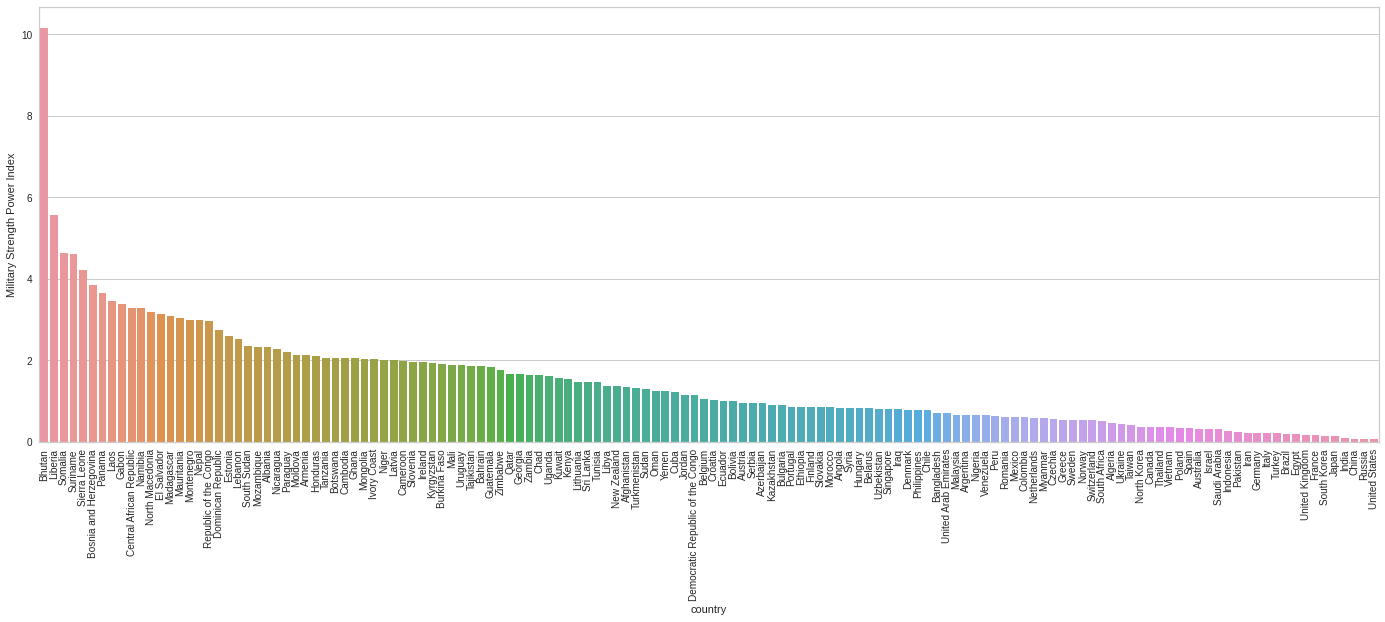

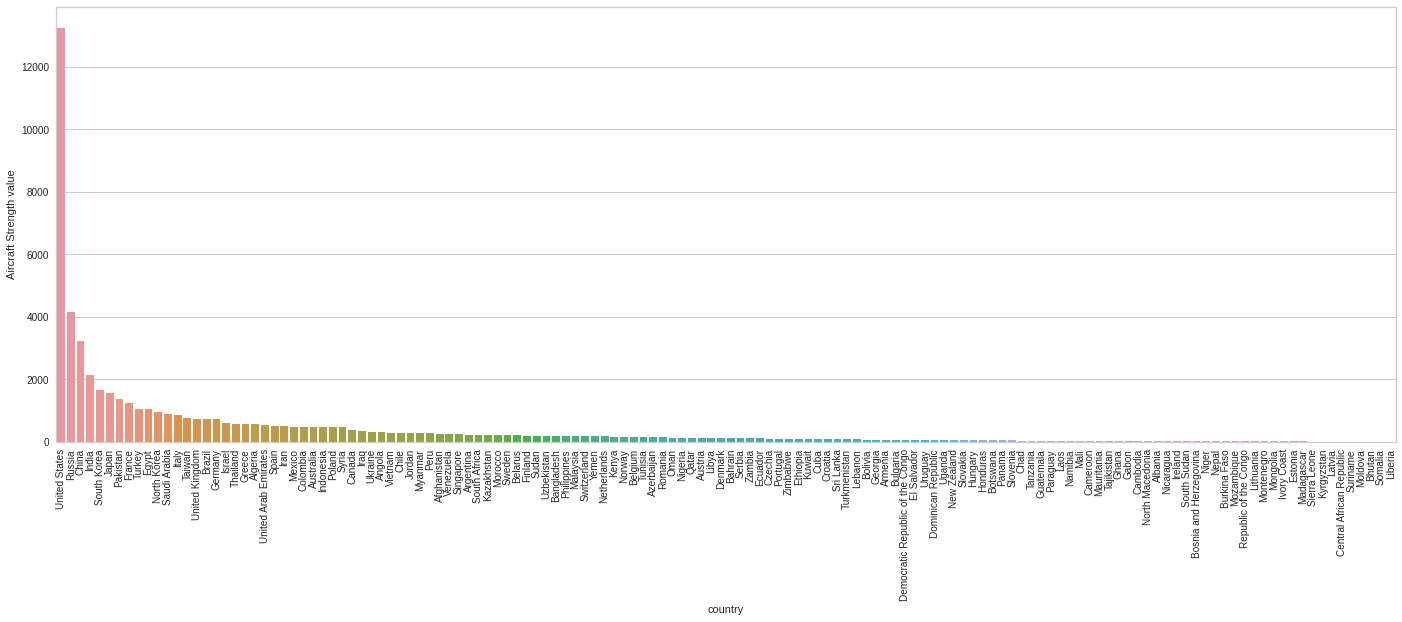

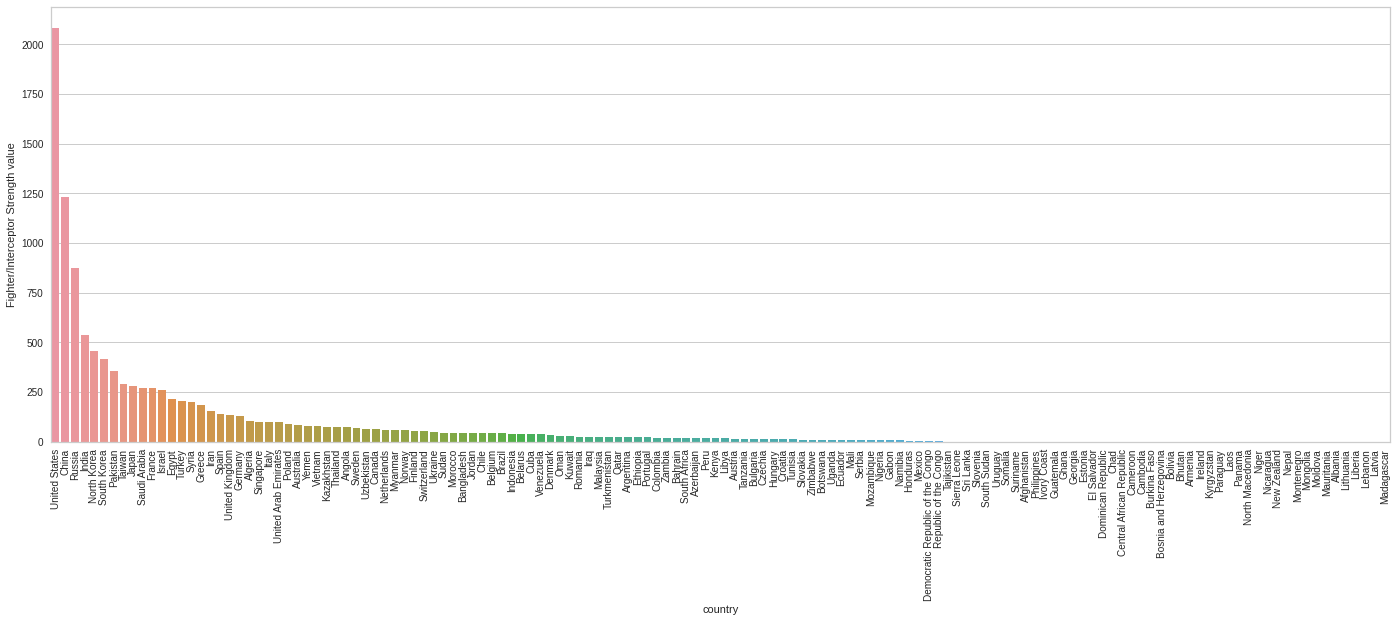

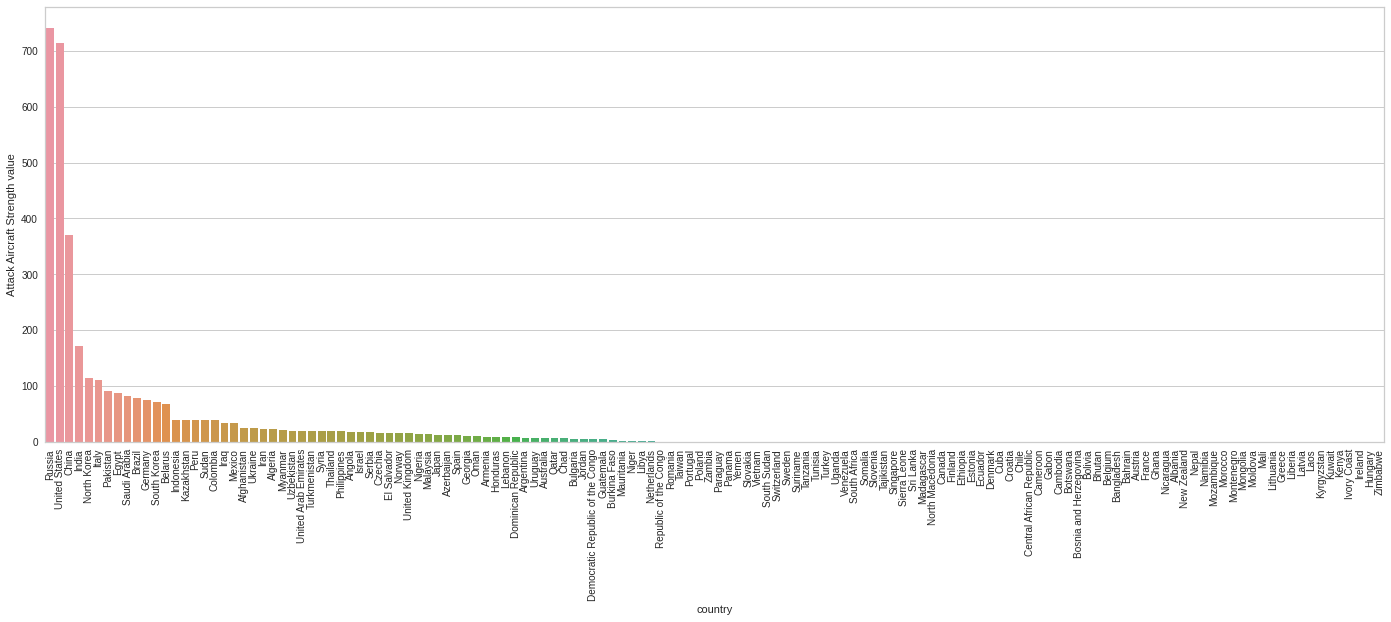

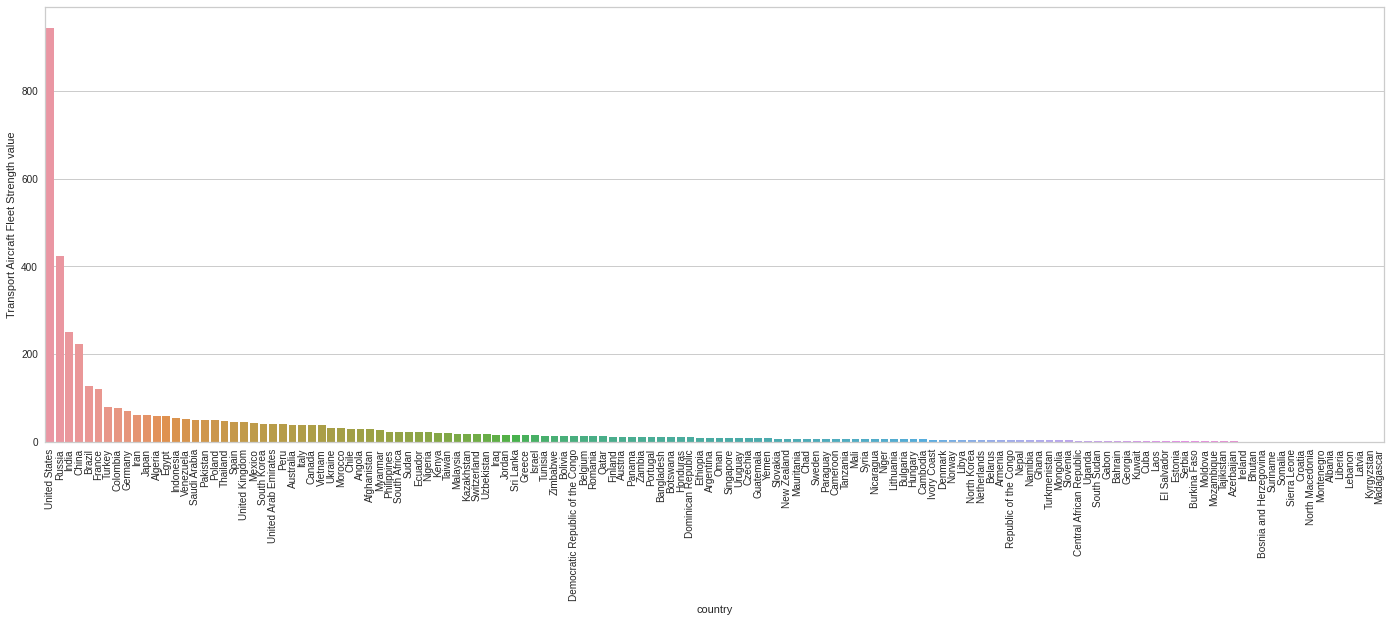

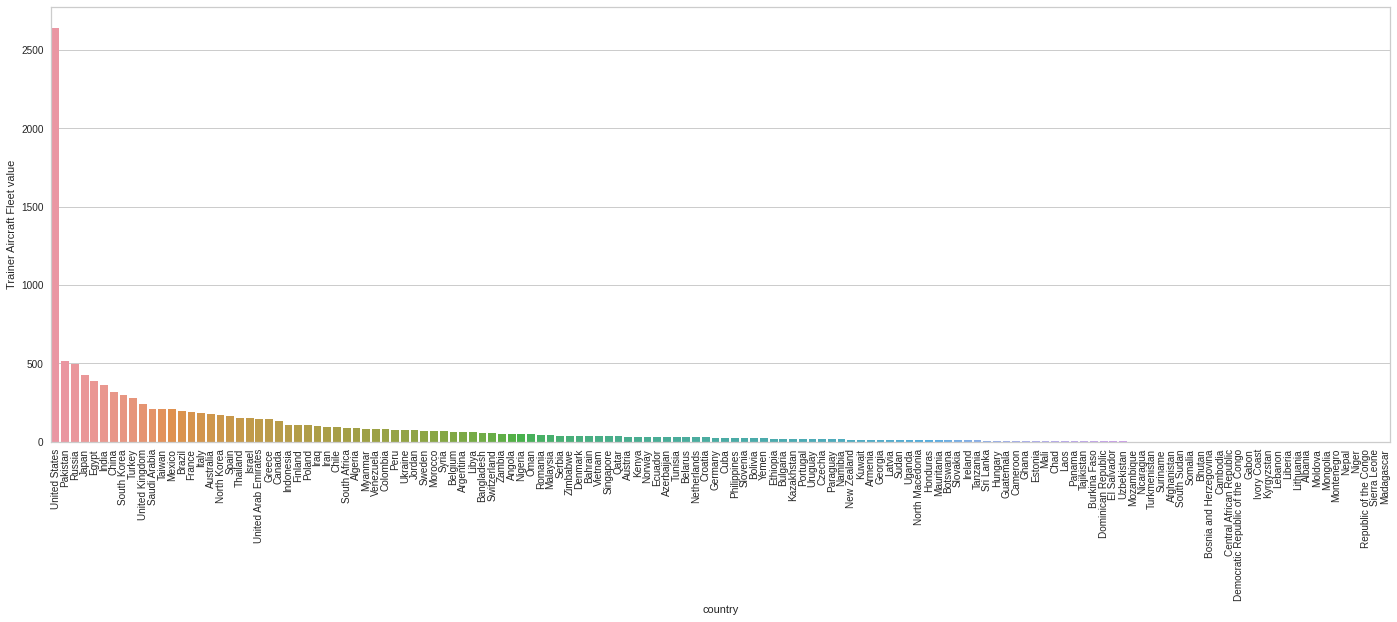

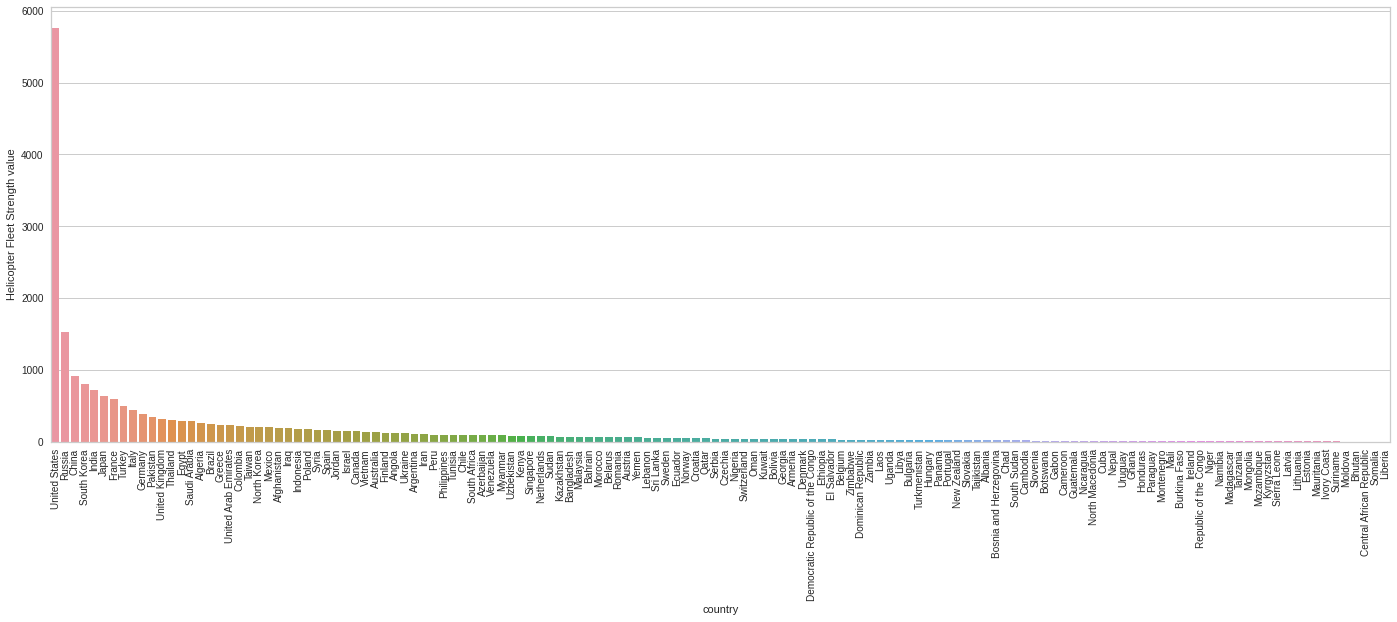

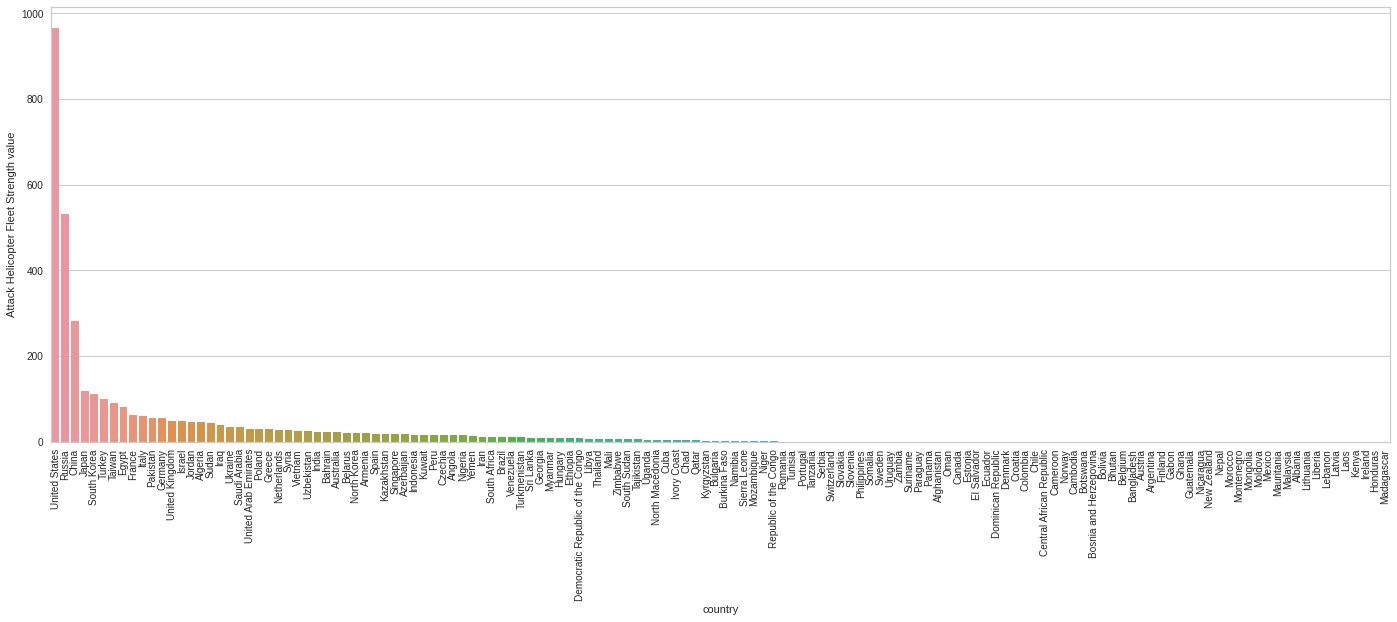

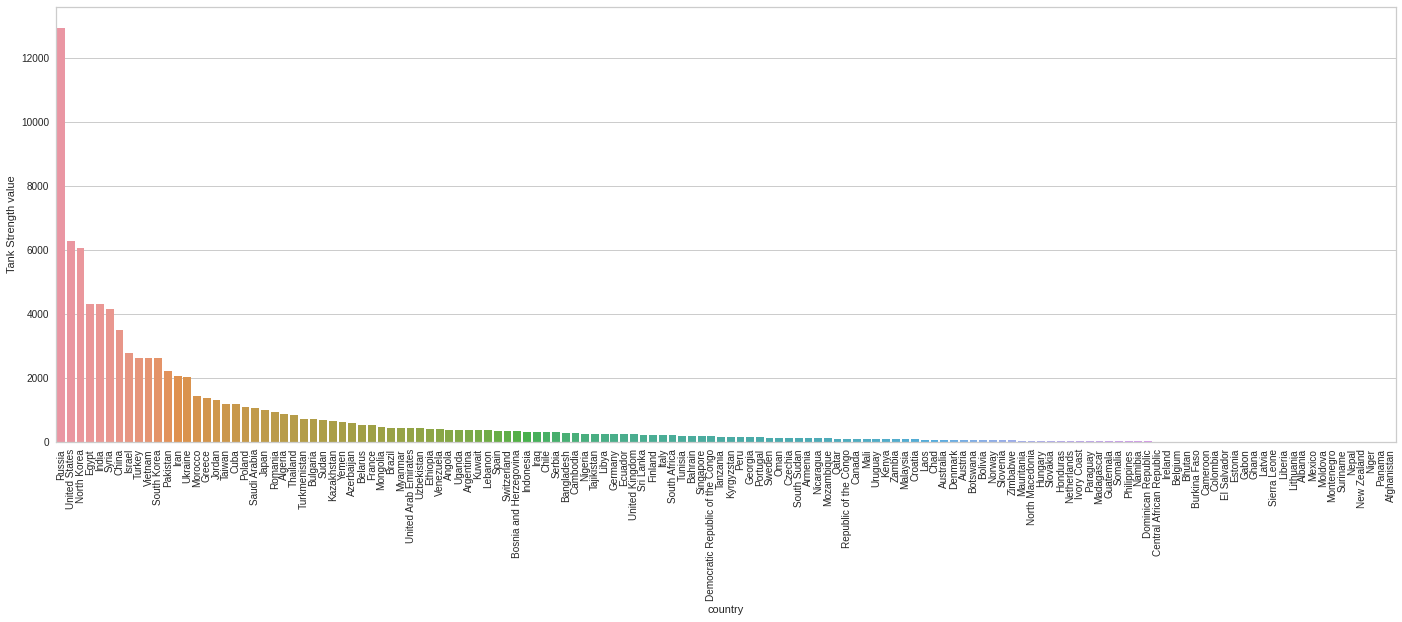

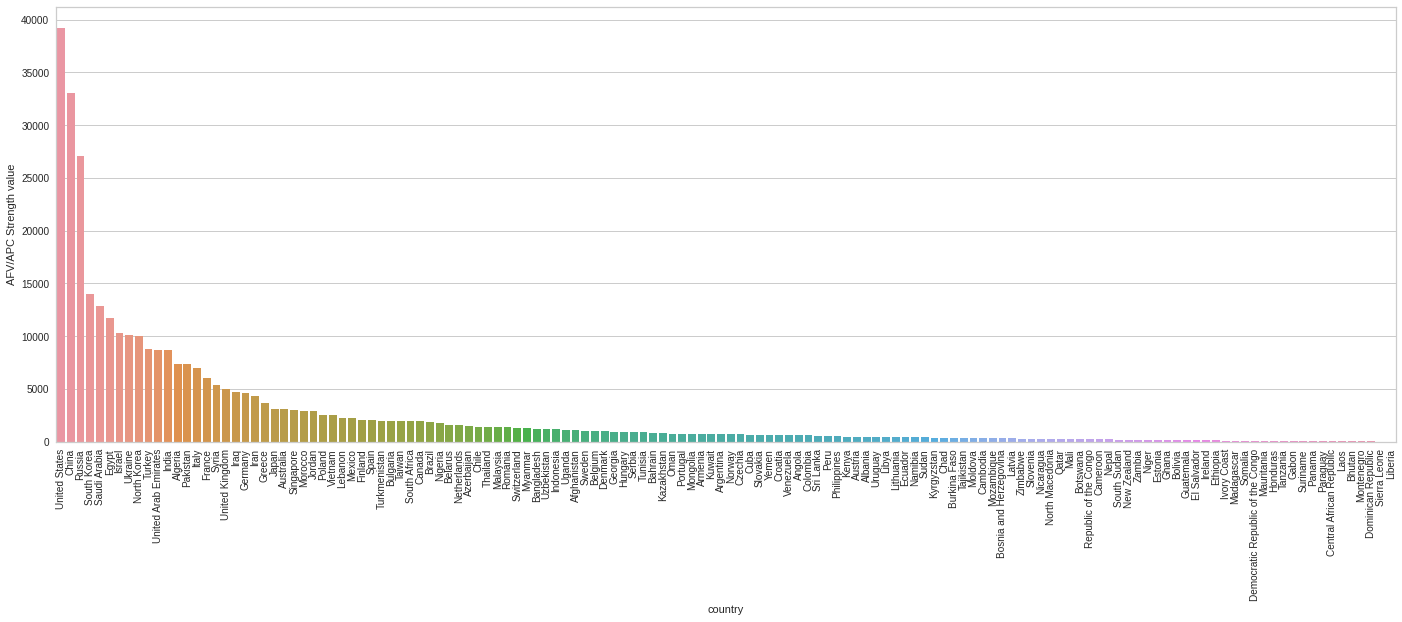

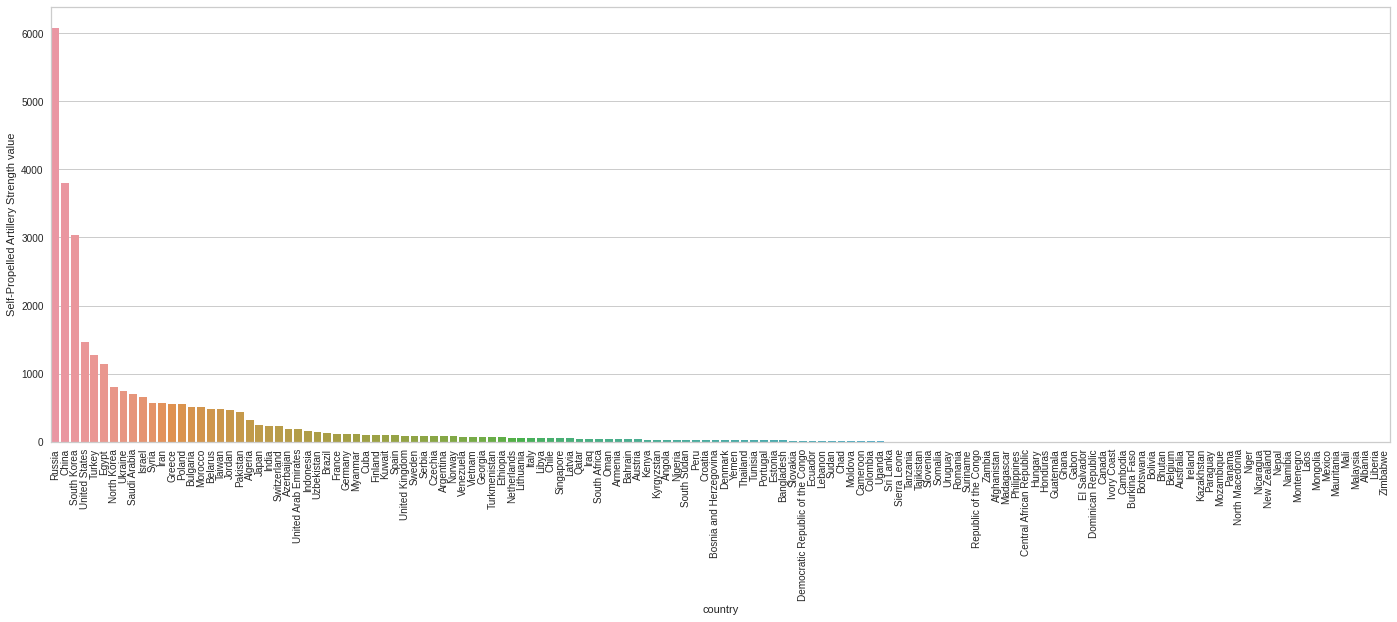

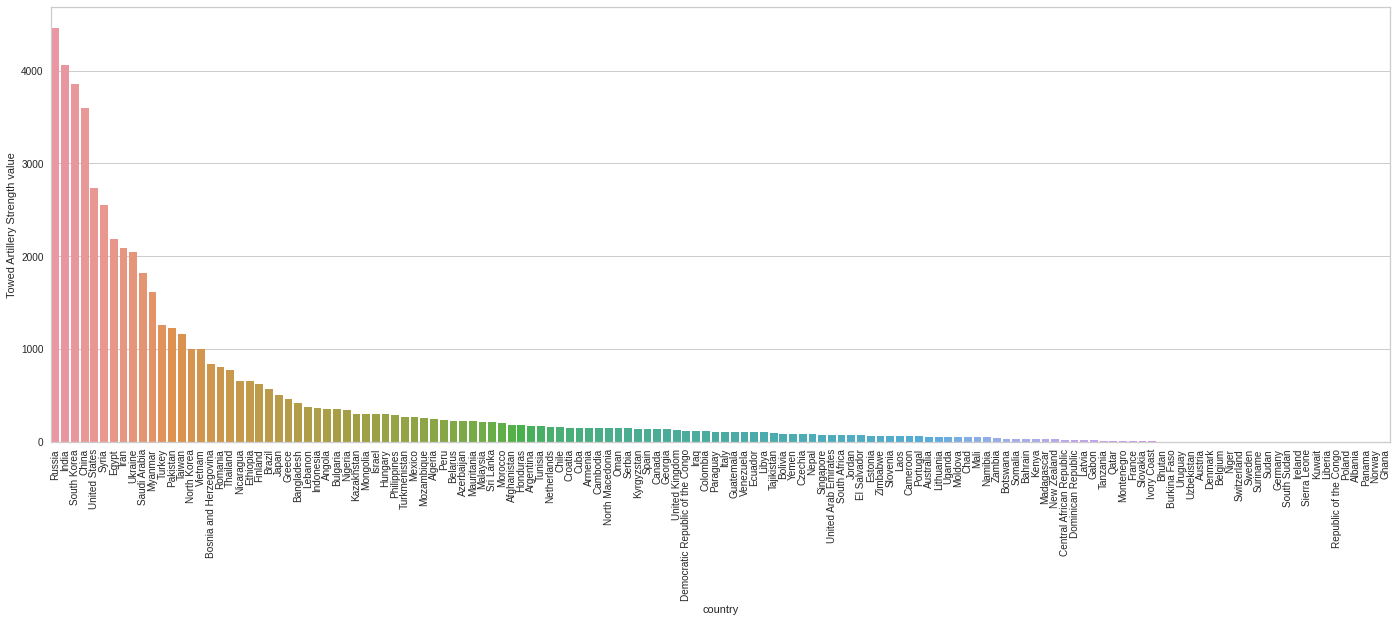

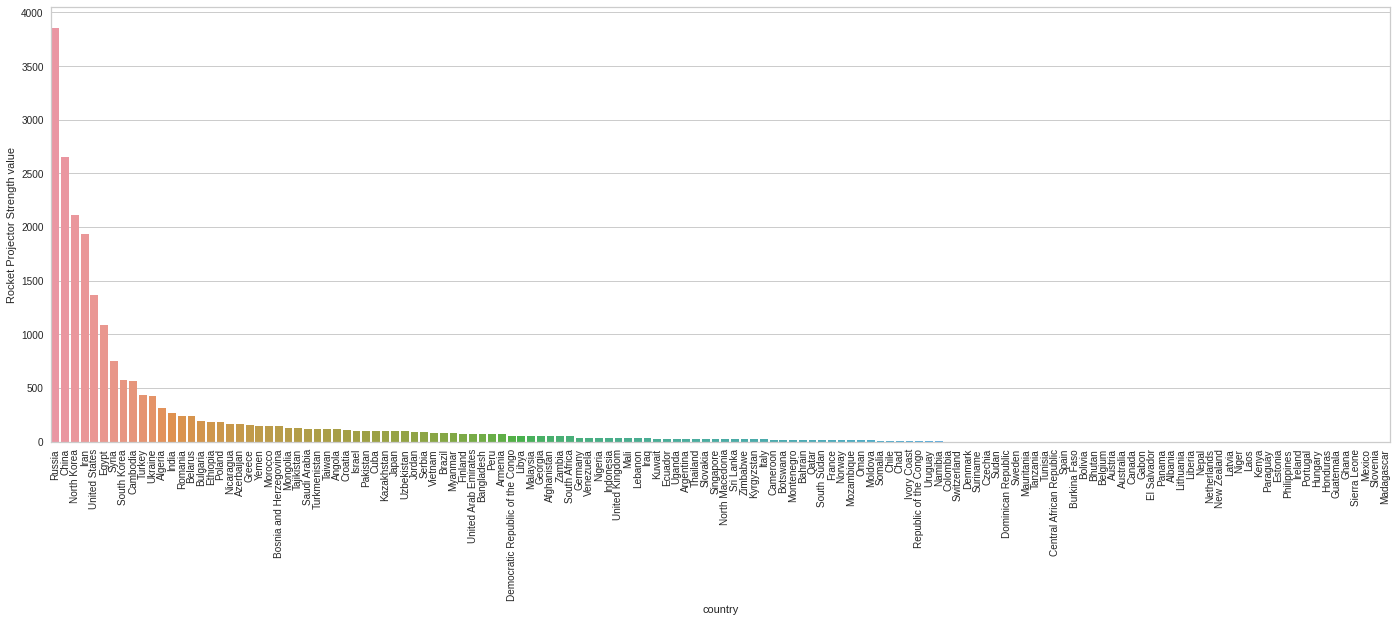

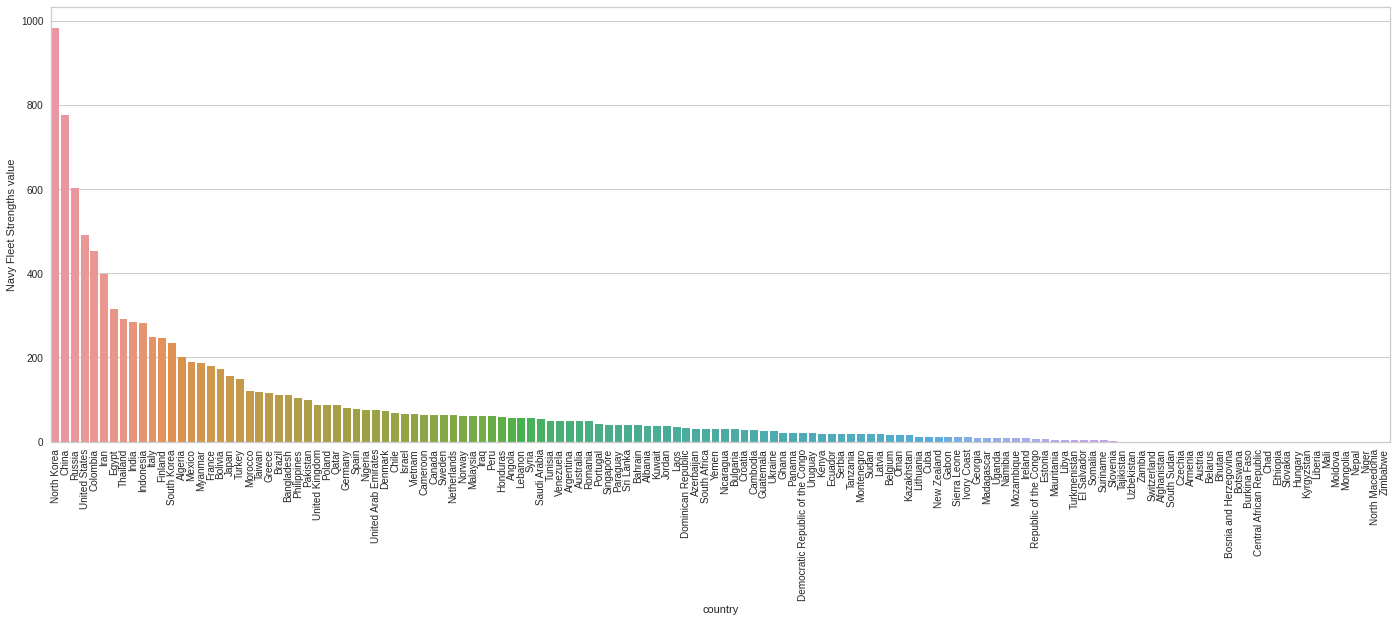

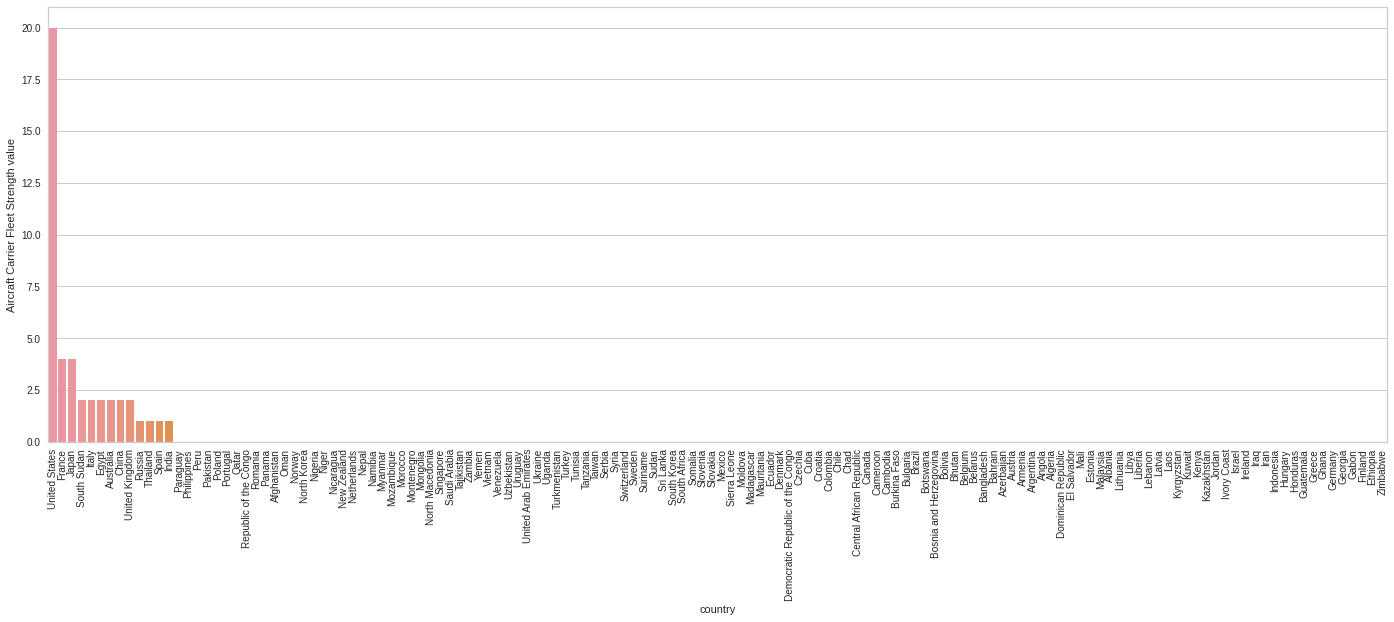

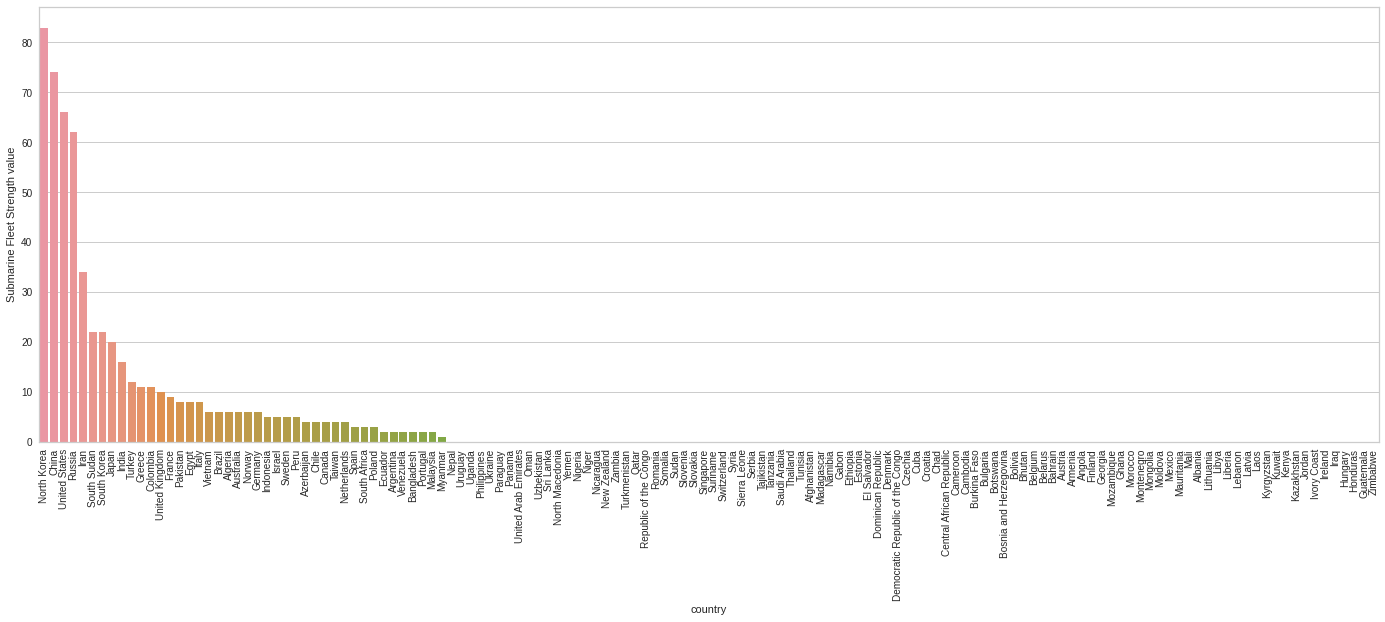

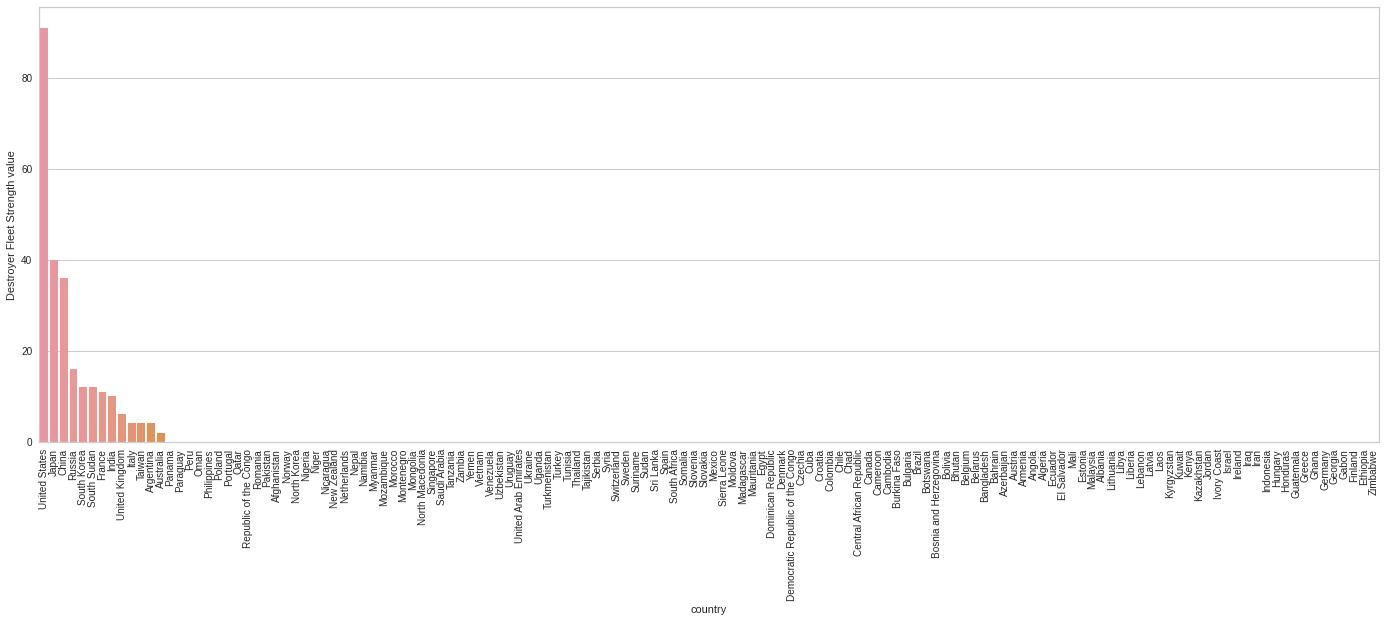

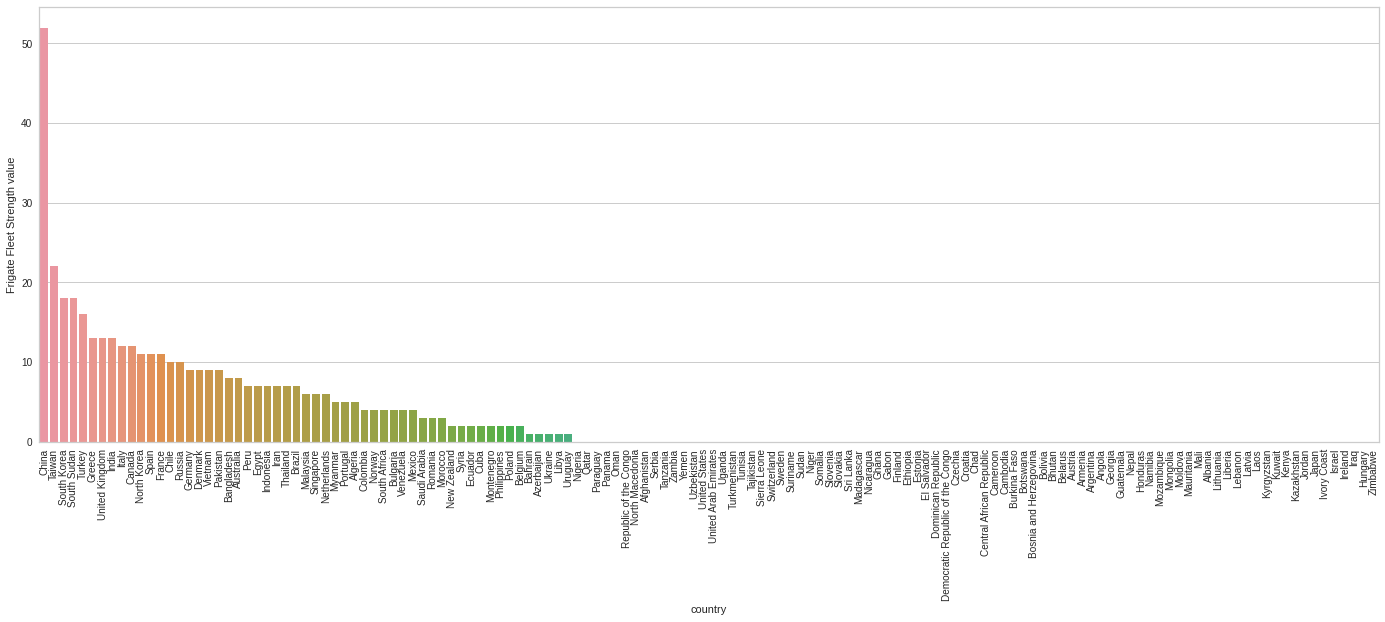

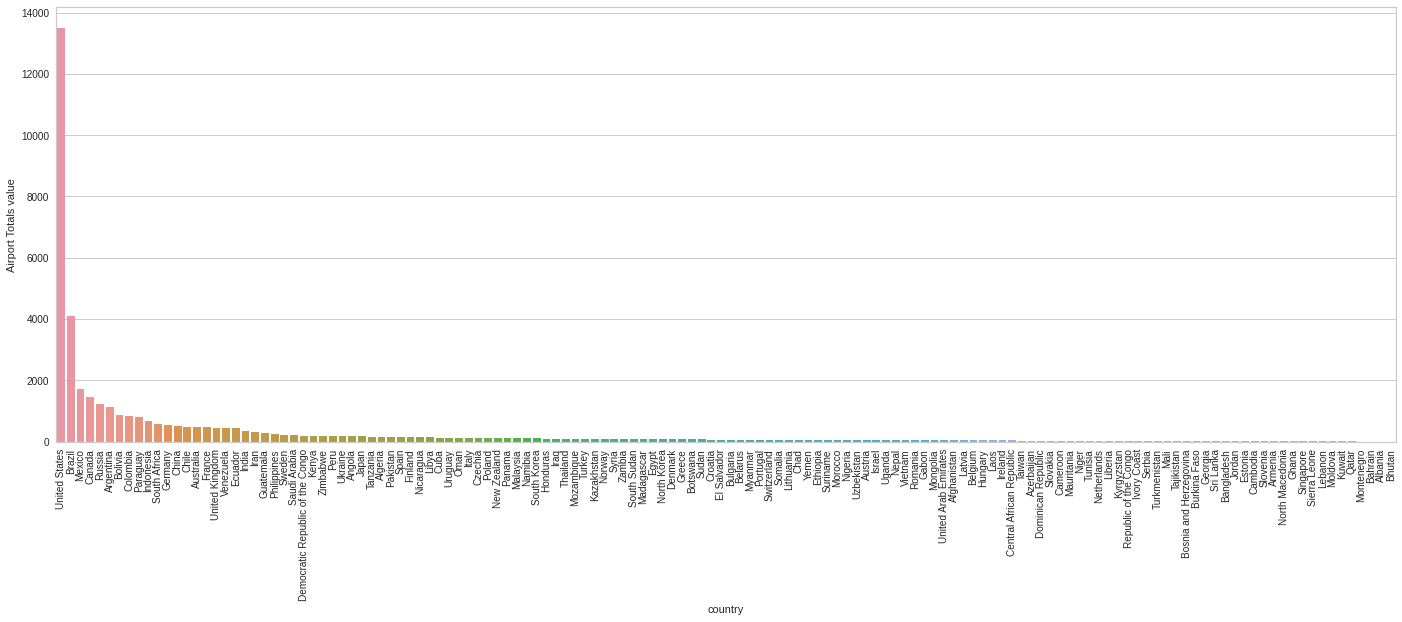

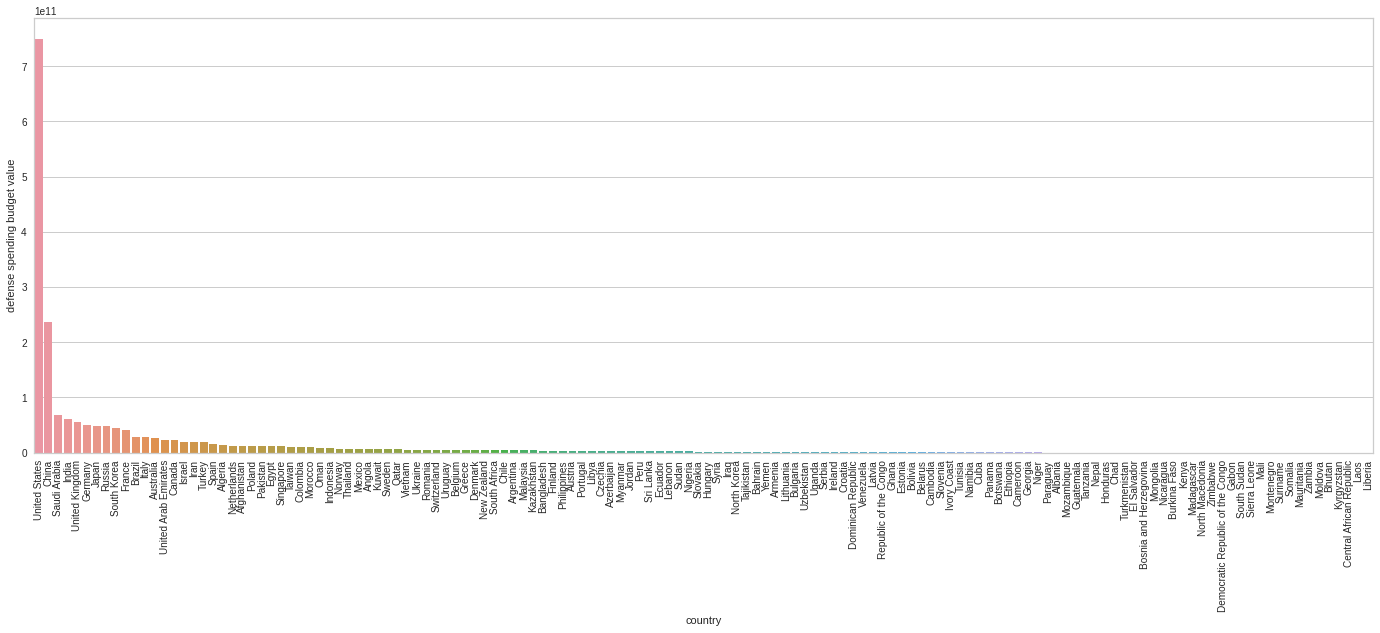

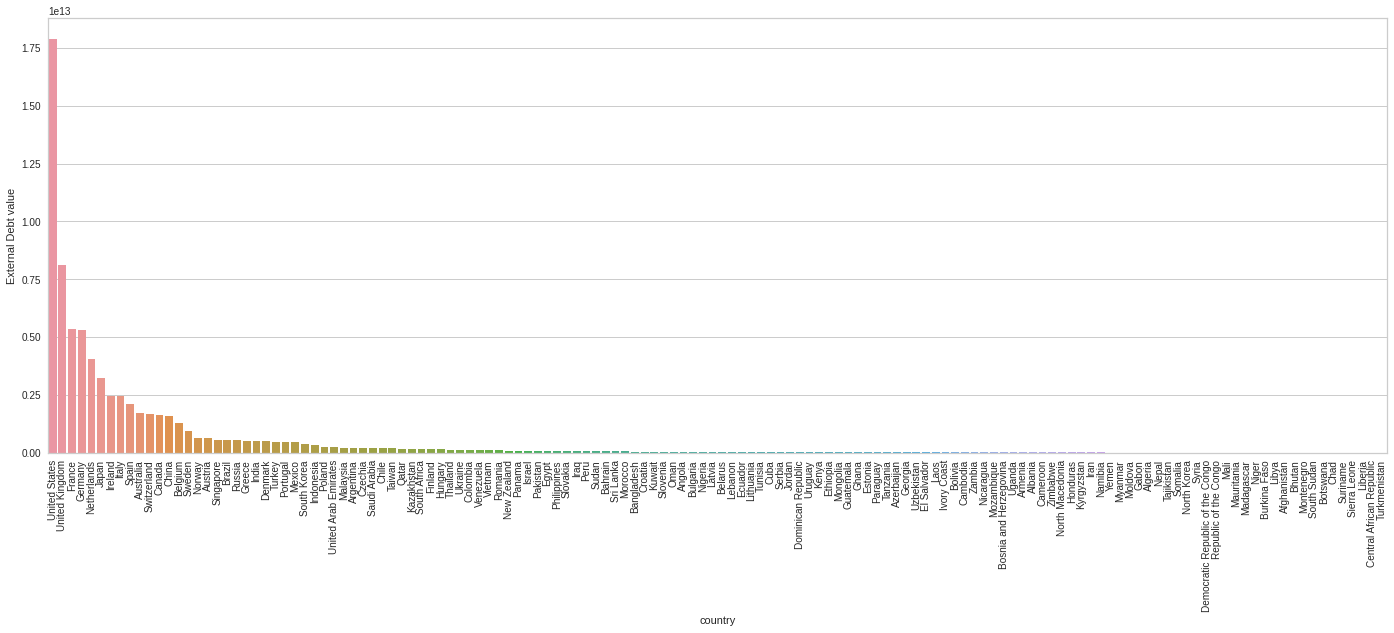

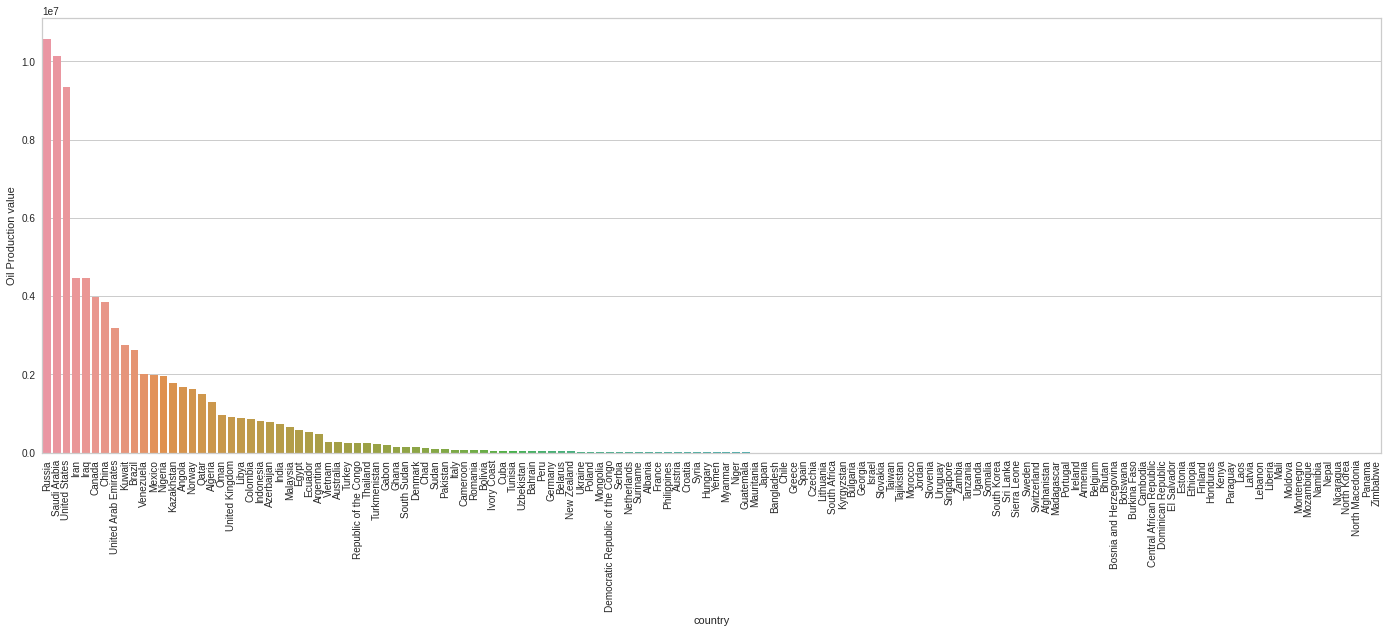

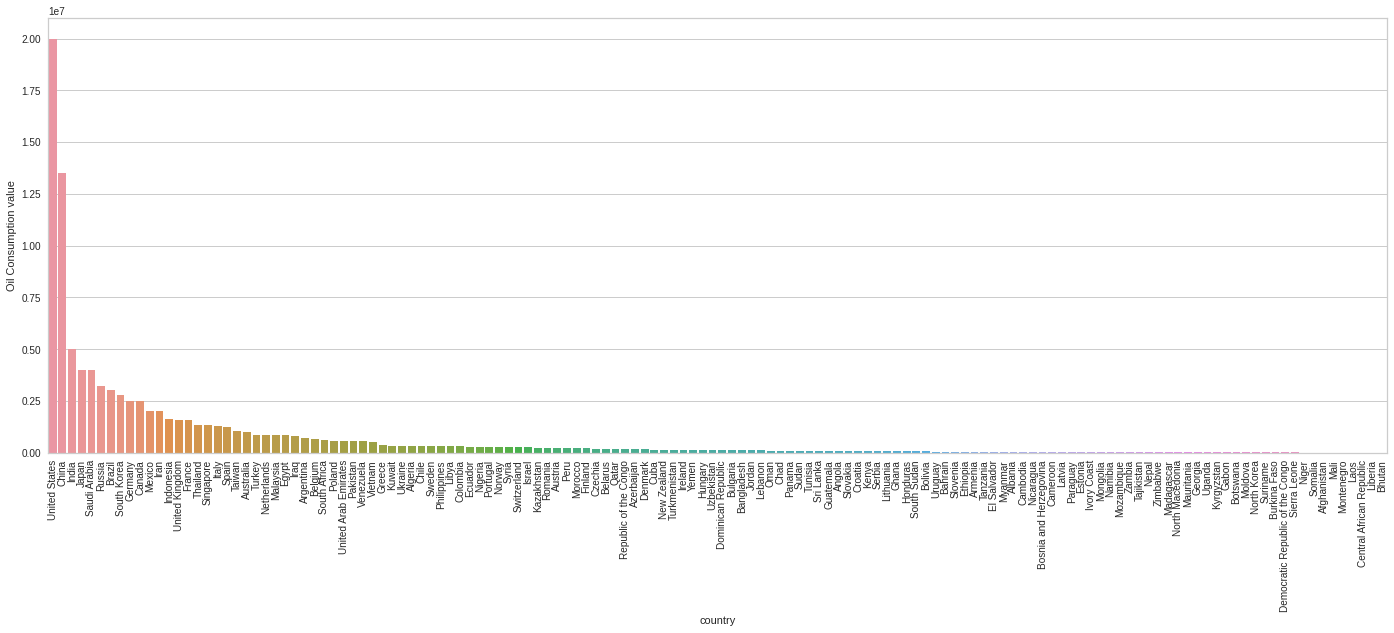

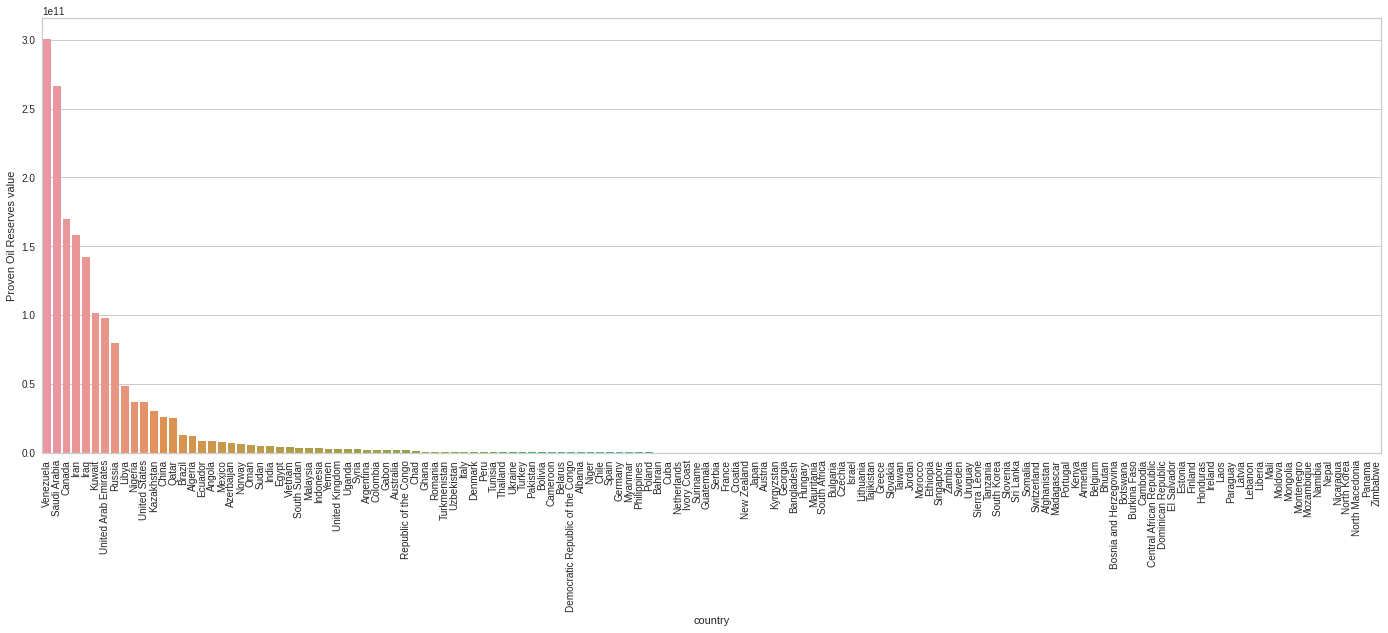

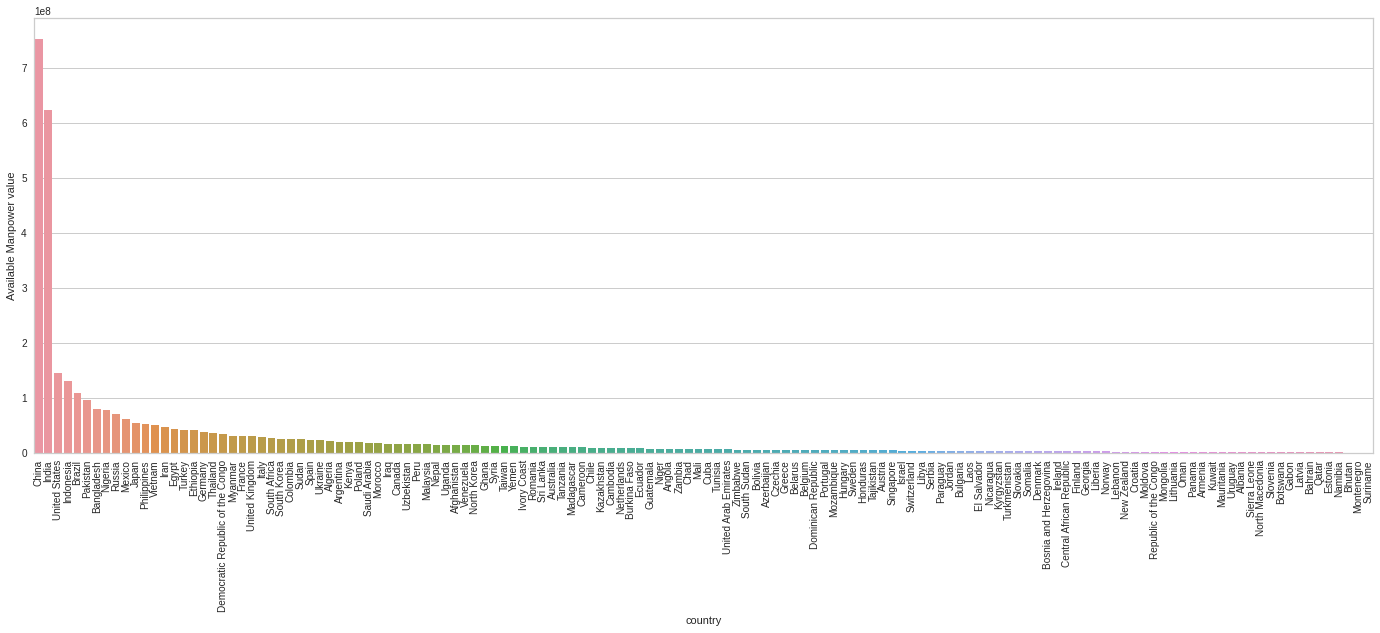

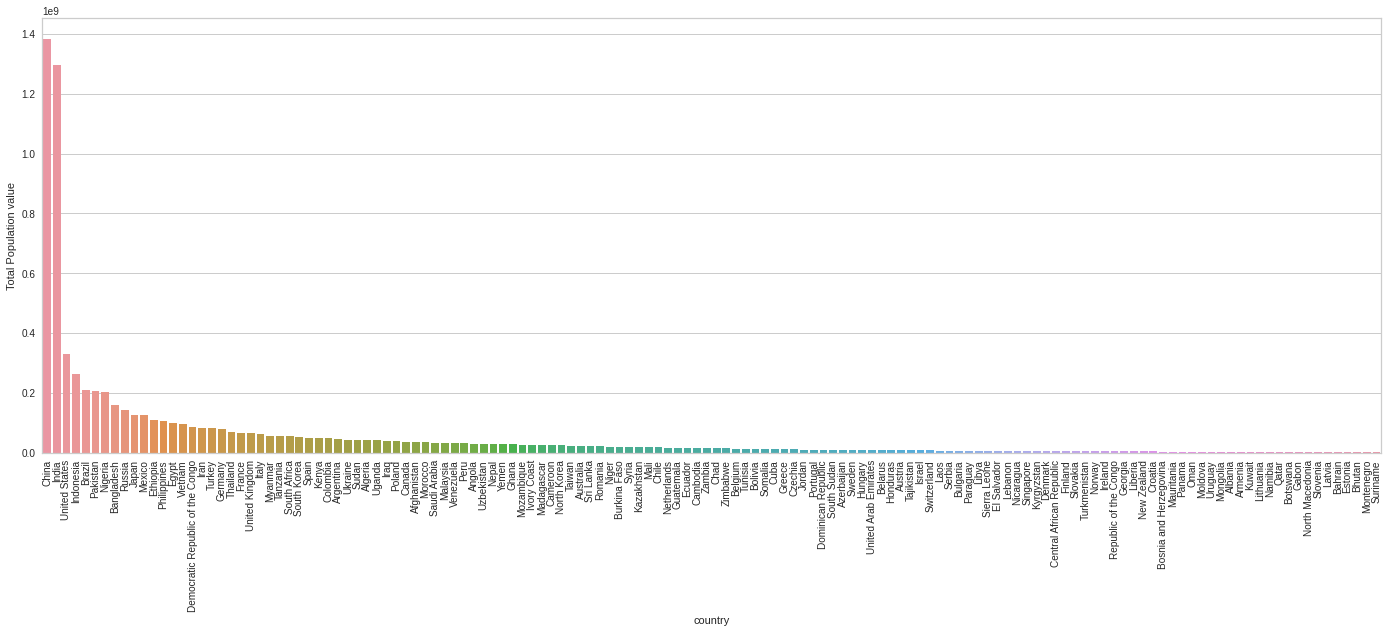

In [54]:
for col in df.columns[1:]:
    plt.figure(figsize = (24, 8))
    sns.barplot( data = df , y = df[col], x = df["country"], order=df.sort_values(col,ascending = False).country)
    plt.xticks(rotation = 90);

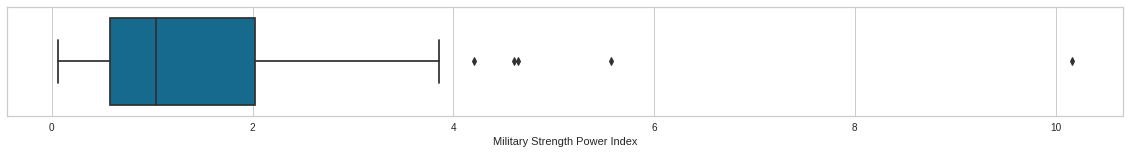

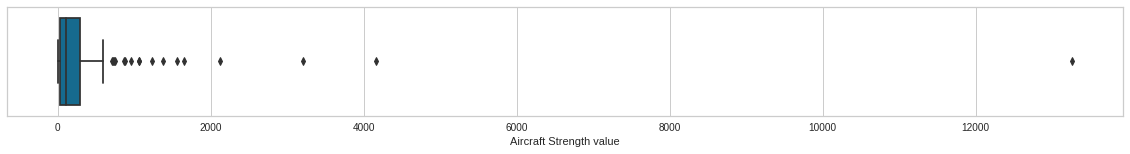

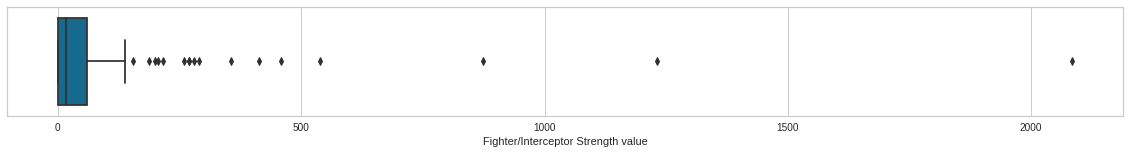

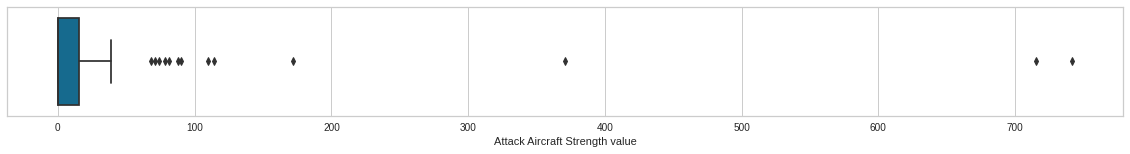

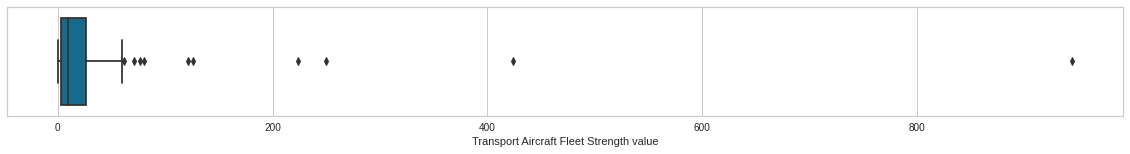

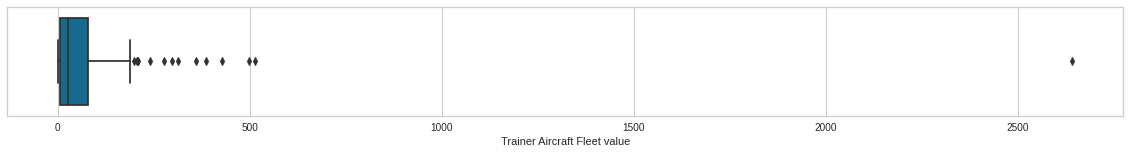

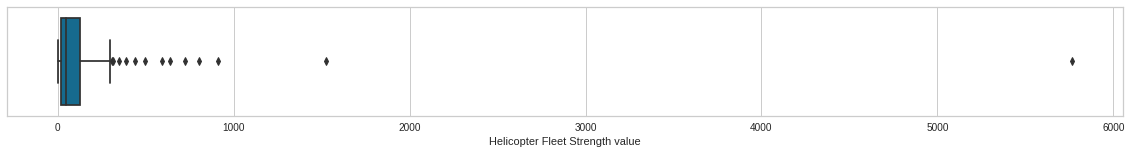

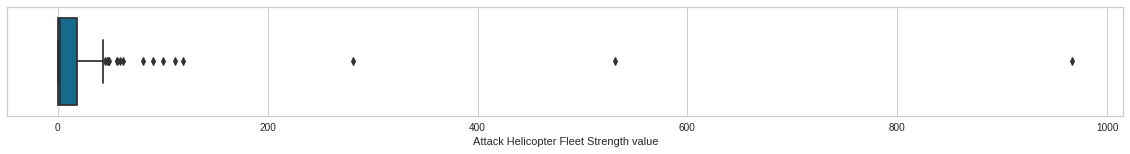

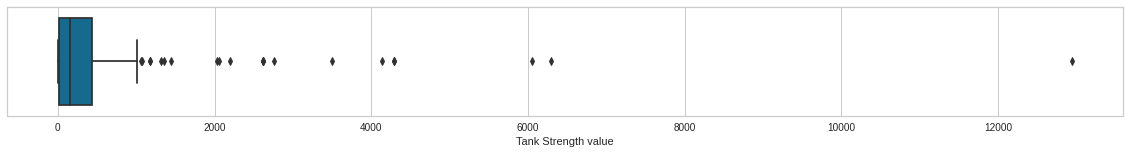

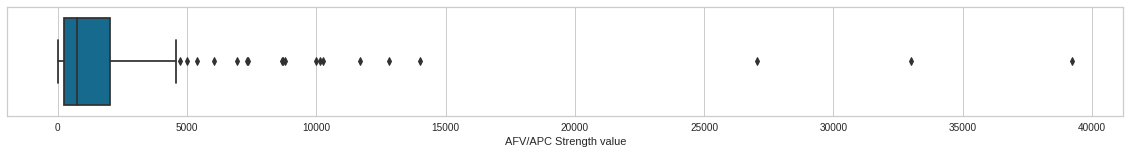

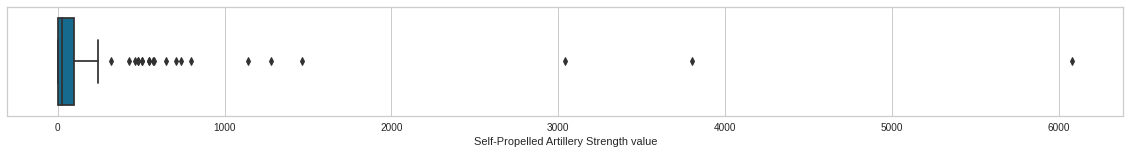

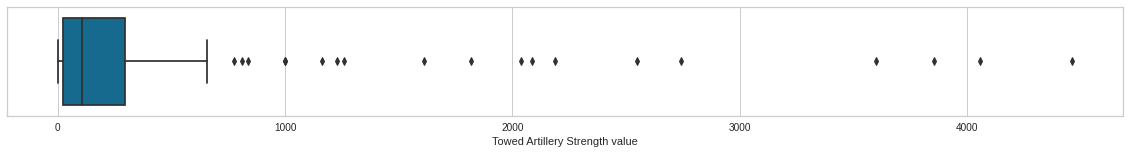

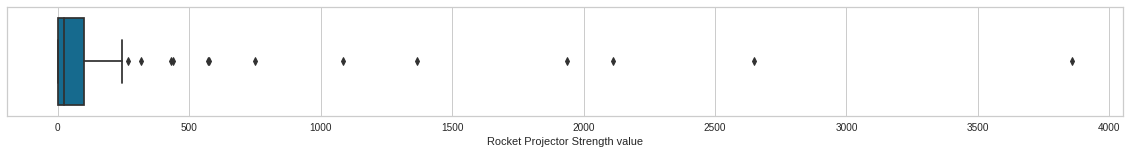

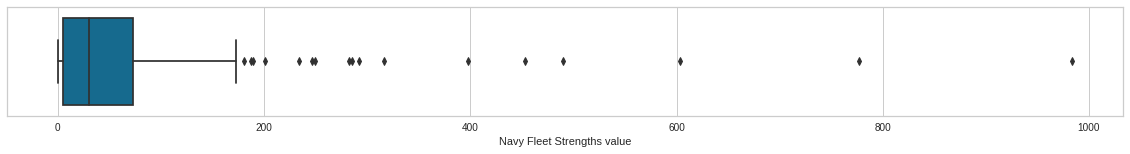

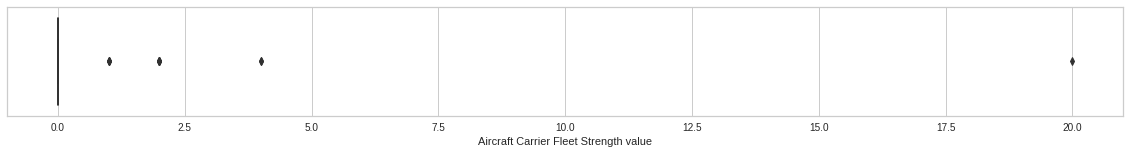

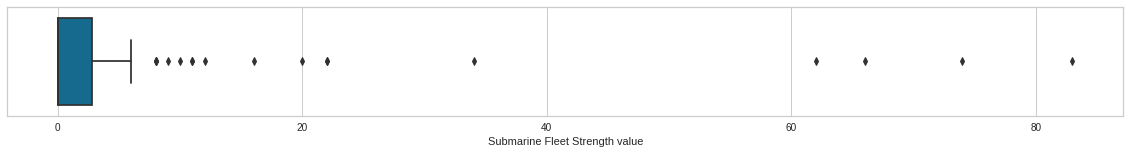

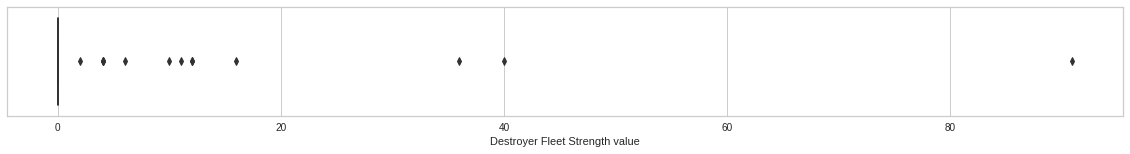

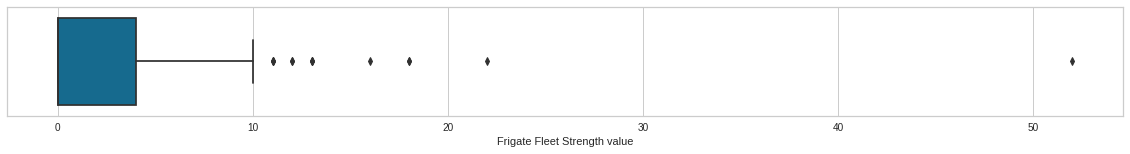

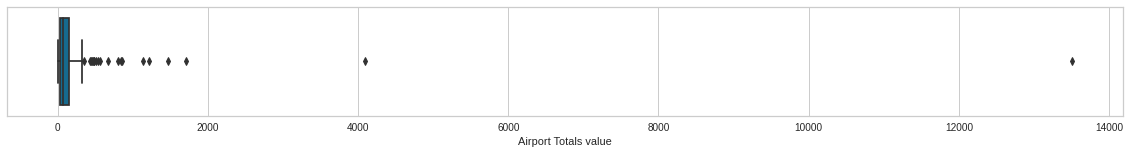

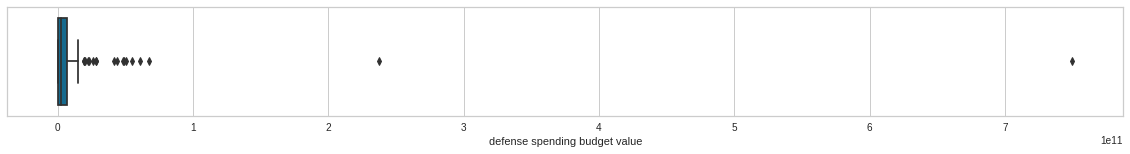

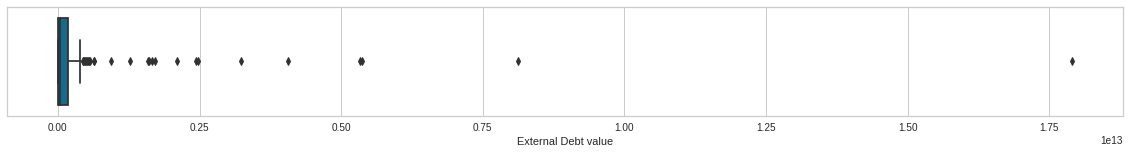

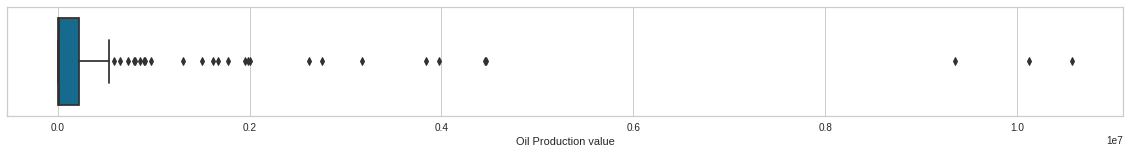

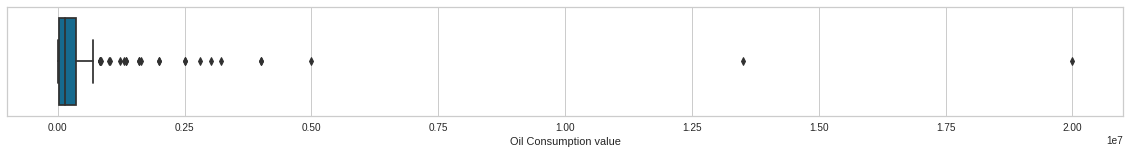

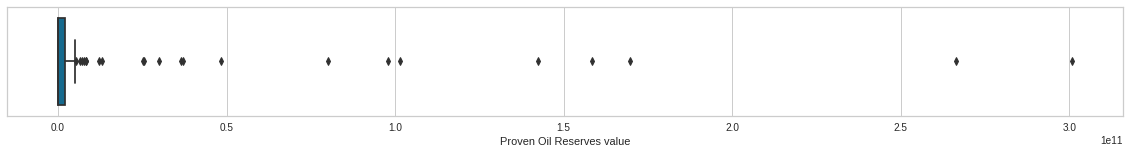

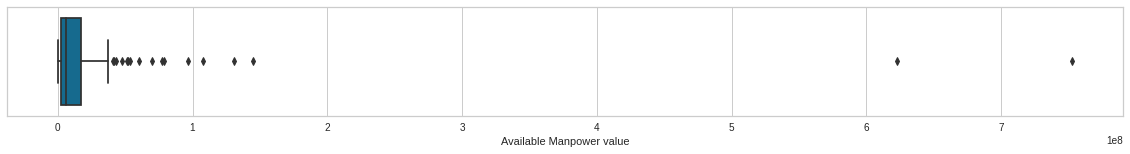

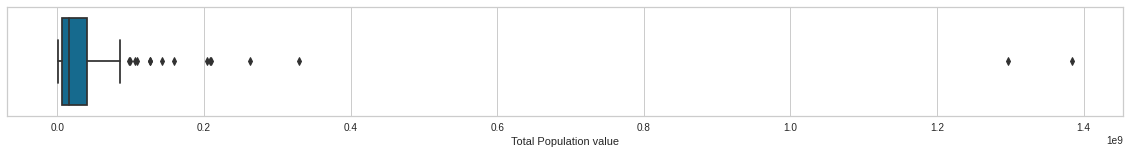

In [55]:
for col in df.columns[1:]:              # It seems there are too many outliers in all features. It is because of the wide gap between developed countries and the developing ones.
    plt.figure(figsize = (20, 2))
    sns.boxplot(data = df, x =df[col])

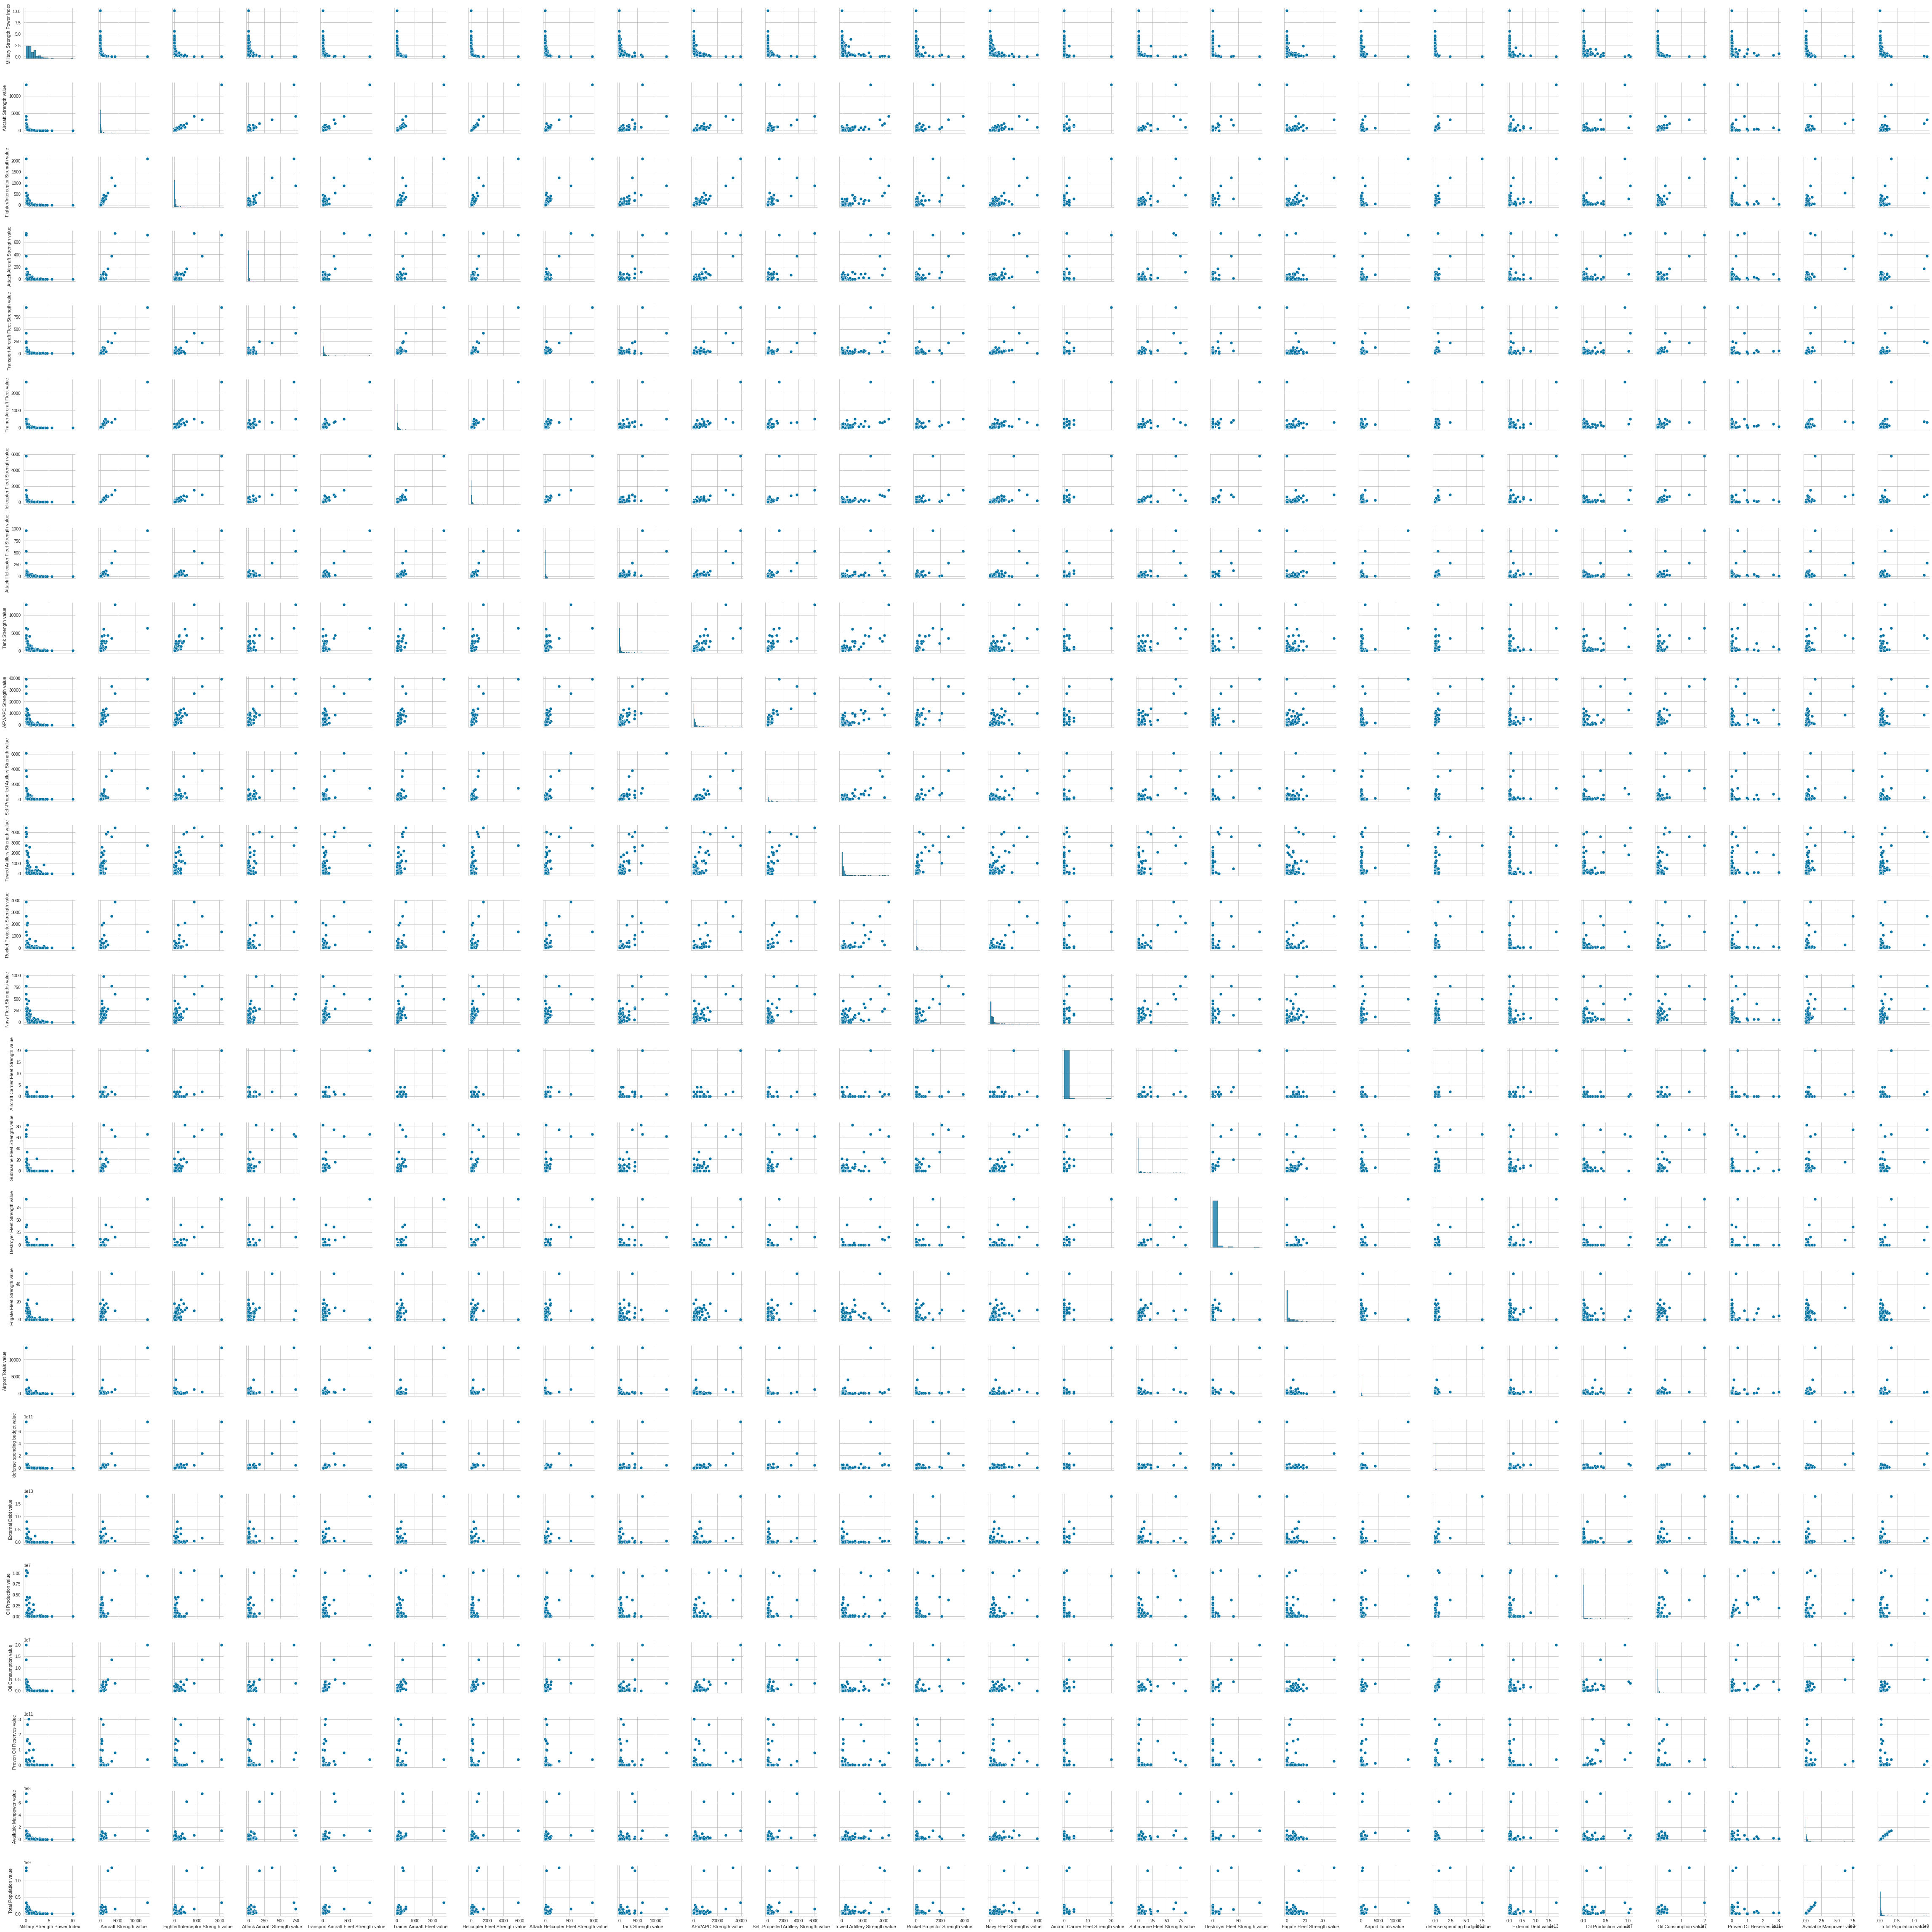

In [56]:
sns.pairplot(df);

## Decriptive statistics

In [57]:
df.describe().T

count           mean             std  \
Military Strength Power Index            138.0            1.5             1.3   
Aircraft Strength value                  138.0          388.5          1232.0   
Fighter/Interceptor Strength value       138.0           81.6           230.3   
Attack Aircraft Strength value           138.0           25.8            94.5   
Transport Aircraft Fleet Strength value  138.0           30.2            92.3   
Trainer Aircraft Fleet value             138.0           82.8           240.8   
Helicopter Fleet Strength value          138.0          154.1           520.2   
Attack Helicopter Fleet Strength value   138.0           25.6            97.3   
Tank Strength value                      138.0          646.6          1515.5   
AFV/APC Strength value                   138.0         2485.7          5410.5   
Self-Propelled Artillery Strength value  138.0          212.2           688.0   
Towed Artillery Strength value           138.0          394.0           805.8   
Rocket Projector Strength value          138.0          156.9           484.4   
Navy Fleet Strengths value               138.0           76.4           140.8   
Aircraft Carrier Fleet Strength value    138.0            0.3             1.8   
Submarine Fleet Strength value           138.0            4.2            12.7   
Destroyer Fleet Strength value           138.0            1.8             9.2   
Frigate Fleet Strength value             138.0            3.1             6.2   
Airport Totals value                     138.0          290.0          1213.0   
defense spending budget value            138.0  13993631641.2   67311892724.1   
External Debt value                      138.0 519498263043.5 1847251527661.9   
Oil Production value                     138.0       585552.4       1667138.9   
Oil Consumption value                    138.0       702018.7       2168810.1   
Proven Oil Reserves value                138.0  11944118420.3   42750903273.1   
Available Manpower value                 138.0     25442969.9      84506975.3   
Total Population value                   138.0     53180584.7     165108987.4   

                                                min          25%  \
Military Strength Power Index                   0.1          0.6   
Aircraft Strength value                         0.0         33.0   
Fighter/Interceptor Strength value              0.0          0.0   
Attack Aircraft Strength value                  0.0          0.0   
Transport Aircraft Fleet Strength value         0.0          3.0   
Trainer Aircraft Fleet value                    0.0          4.2   
Helicopter Fleet Strength value                 0.0         15.2   
Attack Helicopter Fleet Strength value          0.0          0.0   
Tank Strength value                             0.0         19.2   
AFV/APC Strength value                          0.0        250.2   
Self-Propelled Artillery Strength value         0.0          0.0   
Towed Artillery Strength value                  0.0         24.2   
Rocket Projector Strength value                 0.0          0.0   
Navy Fleet Strengths value                      0.0          5.2   
Aircraft Carrier Fleet Strength value           0.0          0.0   
Submarine Fleet Strength value                  0.0          0.0   
Destroyer Fleet Strength value                  0.0          0.0   
Frigate Fleet Strength value                    0.0          0.0   
Airport Totals value                            2.0         33.5   
defense spending budget value            13000000.0  325500000.0   
External Debt value                     539400000.0 9361500000.0   
Oil Production value                            0.0          0.0   
Oil Consumption value                        2000.0      32500.0   
Proven Oil Reserves value                       0.0          0.0   
Available Manpower value                   132740.0    2618384.5   
Total Population value                     597927.0    5819450.5   

                

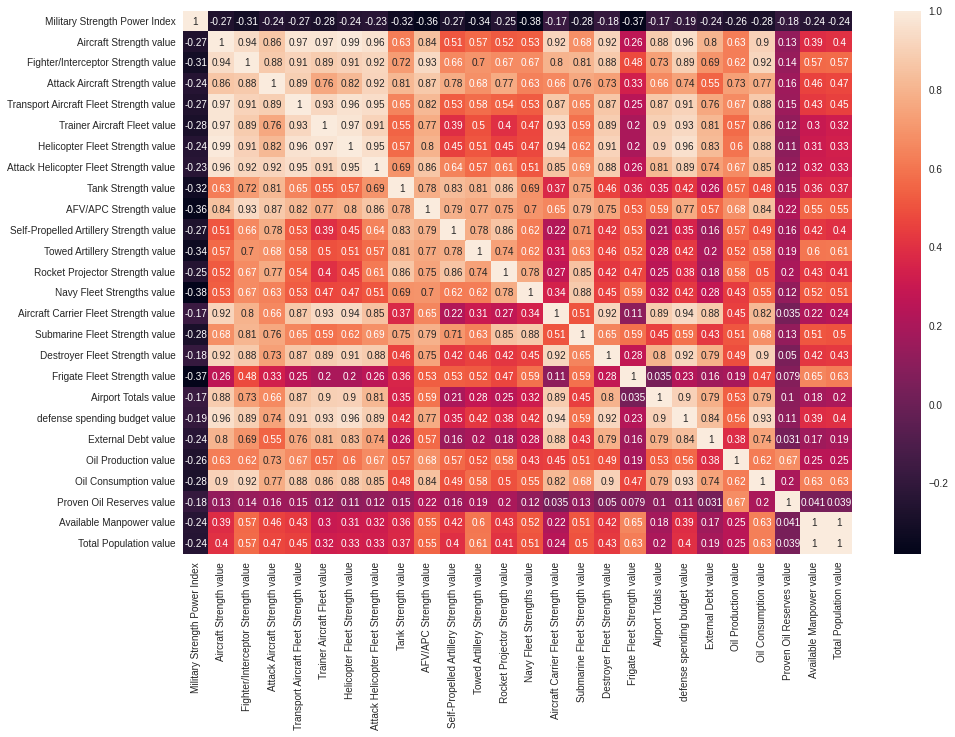

In [58]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True);

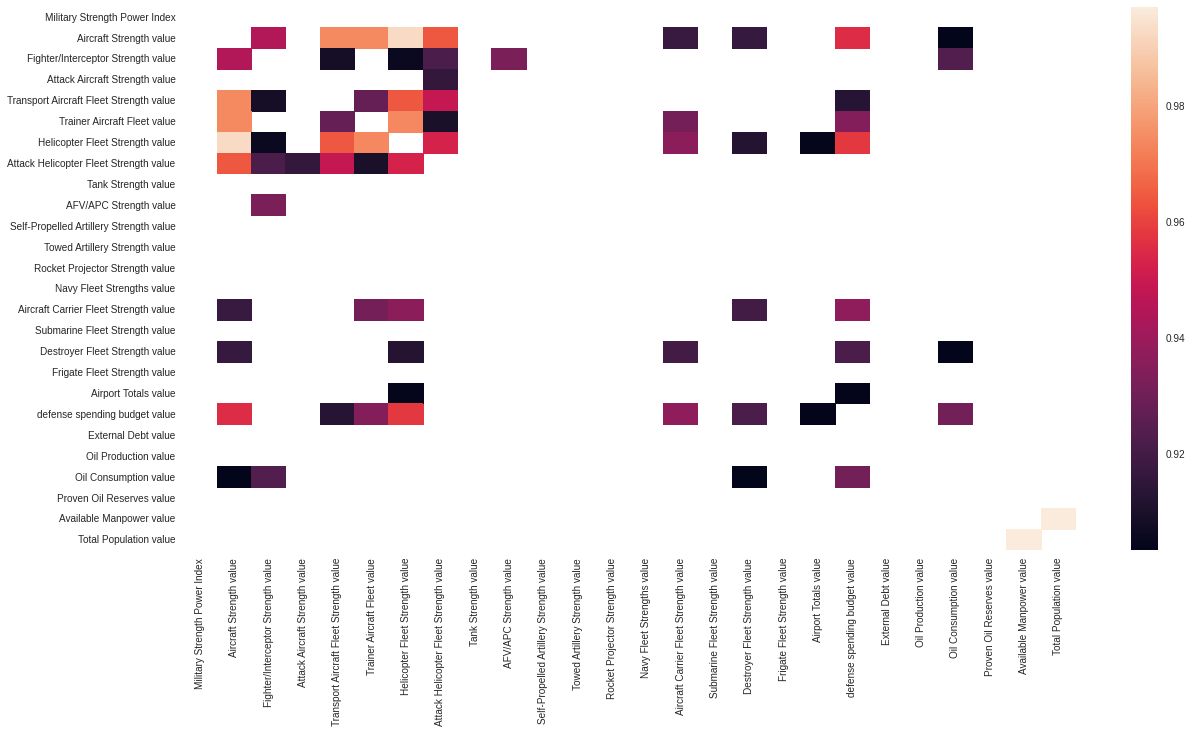

In [59]:
df_temp = df.corr()
filteredDf = df_temp[((df_temp >= .9) | (df_temp <= -.9)) & (df_temp !=1.000)]
plt.figure(figsize=(20,10))
sns.heatmap(filteredDf)  #, annot=True
plt.show()

In [60]:
dfnew = df.drop("Military Strength Power Index", axis = 1) # It seems "Military Strength Power Index" can define the whole data set by itself. It is the summary of whole data set. At first it might be better to run the model by dropping it. According to the results it might be readded to the data and the model might rerun.

# Data Preprocessing

In [61]:
pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pyclustertend import hopkins

# Modelling

In [63]:
X= dfnew.drop(["country"], axis=1)

In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [65]:
X.shape

(138, 25)

In [66]:
hopkins(X, X.shape[0])

0.07223076845069583

## Clustering with K-means

In [67]:
ssd = []

K = range(2,10)

for k in K:
    model1 = KMeans(n_clusters =k, random_state=42)
    model1.fit(X_scaled)
    ssd.append(model1.inertia_)

In [68]:
ssd

[1780.3268758724416,
 1168.268720231611,
 921.8874991624223,
 748.1876389676465,
 635.8738084631157,
 509.34105584031954,
 408.495060221047,
 346.604741242708]

In [69]:
pd.Series(ssd).diff()

0      NaN
1   -612.1
2   -246.4
3   -173.7
4   -112.3
5   -126.5
6   -100.8
7    -61.9
dtype: float64

In [70]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1   NaN
2 612.1
3 246.4
4 173.7
5 112.3
6 126.5
7 100.8
8  61.9

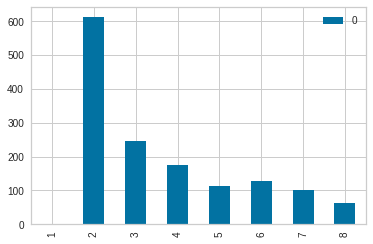

In [71]:
df_diff.plot(kind='bar')

Text(0.5, 1.0, 'elbow method')

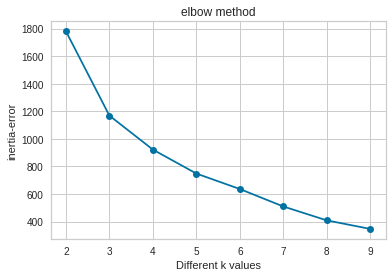

In [72]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

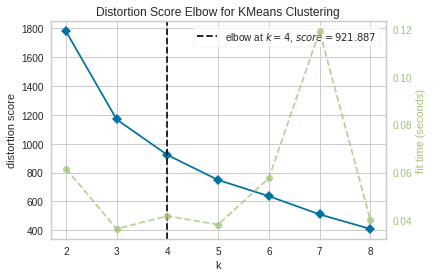

In [73]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

### Model Building and label visualisation

In [74]:
model2 = KMeans(n_clusters=4)
model2.fit(X_scaled)

KMeans(n_clusters=4)

In [75]:
model2.inertia_

922.5468021548113

In [76]:
model2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [77]:
df["cluster"] = model2.labels_

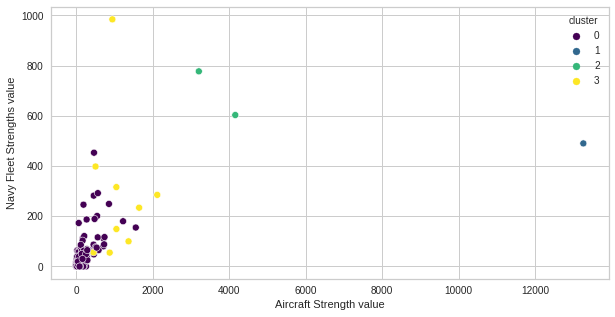

In [78]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Aircraft Strength value"], 
                df["Navy Fleet Strengths value"], hue= df["cluster"], palette= "viridis");

In [79]:
fig = px.scatter_3d(x=df["Aircraft Strength value"],
                   y=df["defense spending budget value"],
                   z=df["External Debt value"],
                   color=df.cluster,
                   labels = {"x": "Aircraft Strength value",
                             "y": "defense spending budget value",
                             "z": "External Debt value"},
                   hover_name=df["country"])

fig.show()

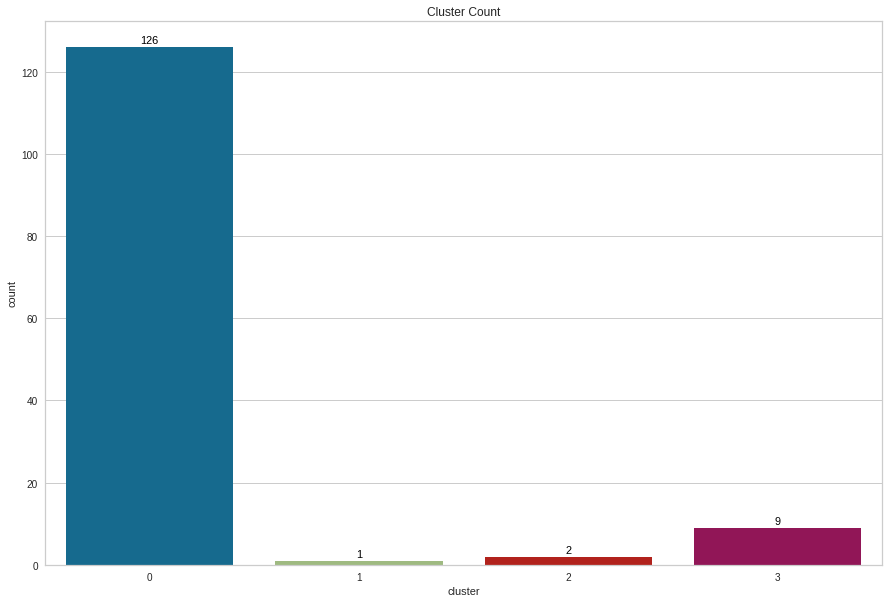

In [80]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df.cluster)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

### Evaluate 

In [81]:
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled, df["cluster"])

0.6702621508273274

In [82]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")


For n_clusters=2, the silhouette score is 0.8767494499384902
For n_clusters=3, the silhouette score is 0.836649444813568
For n_clusters=4, the silhouette score is 0.667298031587701
For n_clusters=5, the silhouette score is 0.6211571412932497
For n_clusters=6, the silhouette score is 0.5729866751456901
For n_clusters=7, the silhouette score is 0.6132618702728247
For n_clusters=8, the silhouette score is 0.5354532376194978


## Hierarchical Clustering

“linkage” parameter: (default= “ward”)

{‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation.

Ward minimizes the variance of the clusters being merged.
Average uses the average of the distances of each observation of the two sets.
Complete or maximum linkage uses the maximum distances between all observations of the two sets.
Single uses the minimum of the distances between all observations of the two sets.

### Dendogram

In [84]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [85]:
hc_ward = linkage(y = X_scaled, method = "ward")
hc_complete = linkage(X_scaled, "complete")
hc_average = linkage(X_scaled, "average")
hc_single = linkage(X_scaled, "single")

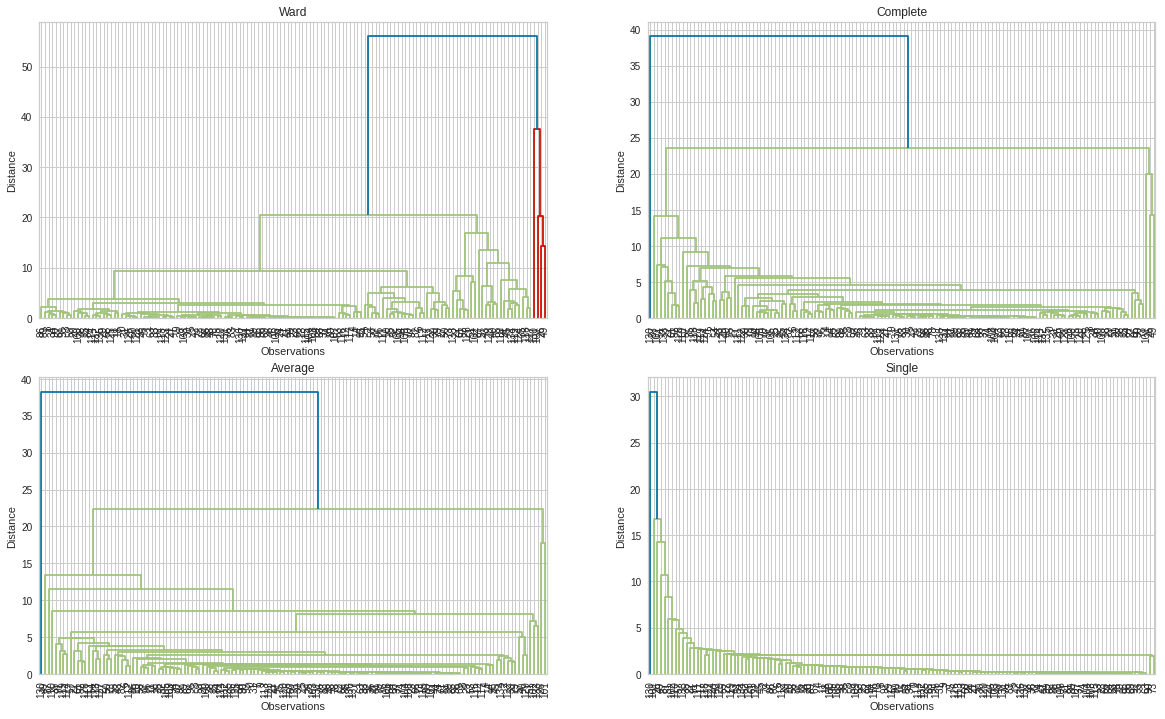

In [86]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);


### Model Building and label visualisation

In [87]:
from sklearn.cluster import AgglomerativeClustering

In [88]:
model4 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model4.fit_predict(X_scaled)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3])

In [89]:
df["cluster_hr"] = model4.labels_

In [91]:
fig = px.scatter_3d(x=df["Aircraft Strength value"],
                    y=df["defense spending budget value"],
                    z=df["External Debt value"],
                    color=df["cluster_hr"],
                    labels = {"x":"Aircraft Strength value",
                              "y": "defense spending budget value",
                              "z": "External Debt value"},
                    hover_name=df["country"])

fig.show()

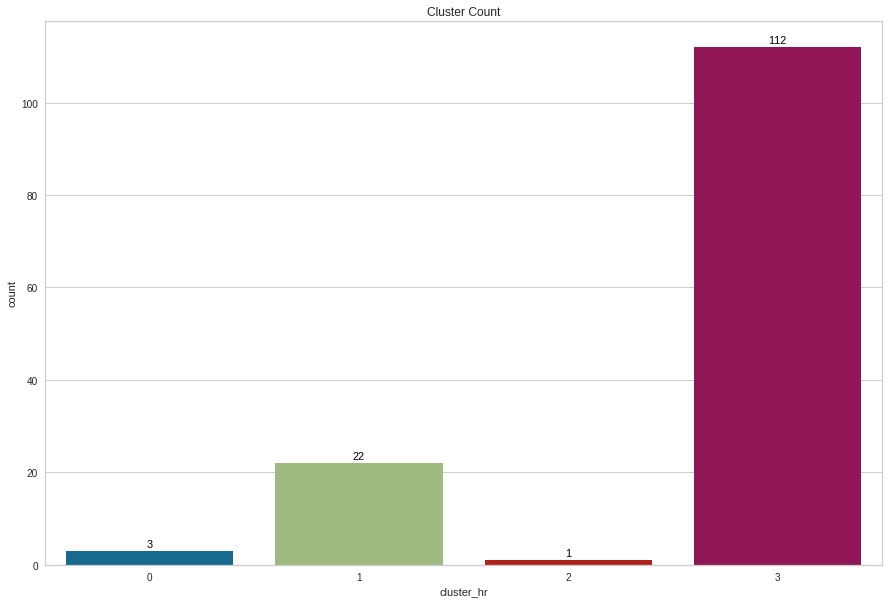

In [92]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df["cluster_hr"])

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();


### Evaluate 

In [93]:
silhouette_score(X_scaled, df["cluster_hr"])

0.5752948886104667